## <font color='red'>Section 1. Data Understanding </font> 

***This project, it is followed CRISP-DM steps.***

#### 1.1 Importing Required Libraries

In [134]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt #For Visualization
from scipy.stats import skew # For Skewness
from scipy import stats # For General Statistics
import pylab as p # For Skewness
from scipy.stats import kurtosis #For Kurtosis
from scipy import stats
from scipy.stats import chisquare
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor # AnomalyDetection
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #  Regressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
import linearmodels as panel # For Panel Data


warnings.filterwarnings('ignore')

#### 1.2. Loading The Data Into The DataFrame

In [135]:
arable_land           = pd.read_csv("Countries Arable Lands - 1990-2020.csv")
people_in_farm        = pd.read_csv("Number of People Working in Agriculture 1990-2020.csv")
precipitation         = pd.read_csv("Observed Average Annual Mean-Precipitation - 1990-2020.csv")
temperature           = pd.read_csv("Observed Average Annual Mean-Temperature-1990-2020.csv")
agriculture_ie        = pd.read_csv("Irelands Agriculture Data -1990-2020.csv")
agriculture_de        = pd.read_csv("Germany_s-Agriculture-Data-1990-2020.csv")
agriculture_nl        = pd.read_csv("Netherland_s-Agriculture-Data-1990-2020.csv")
potatoes_ie           = agriculture_ie.iloc[:,3:4]
potatoes_de           = agriculture_de.iloc[:,3:4]
potatoes_nl           = agriculture_nl.iloc[:,3:4]

# Each dataset has a "year" column. So, it is dropped to avoid confusion.
people_in_farm        = people_in_farm.drop(["Year"], axis=1) 
precipitation         = precipitation.drop(["Year"],axis=1)
temperature           = temperature.drop(["Year"], axis=1) 

#### 1.3. Loading The Data Into The DataFrame

In [136]:
# 1.3.1 Ireland Dataset Prepared
year_hectar_ireland    = arable_land.iloc[:,0:2]
people_farm_ireland    = people_in_farm.iloc[:,0:1]
precipitation_ireland  = precipitation.iloc[:,0:1]
temperature_ireland    = temperature.iloc[:,0:1]

columns_ireland = [year_hectar_ireland, people_farm_ireland, precipitation_ireland,temperature_ireland,potatoes_ie]
ireland_dataset = pd.concat((columns_ireland),axis=1)

In [137]:
# 1.3.2 Germany Dataset Prepared
year_hectar_germany     = arable_land.iloc[:,2:3]
people_farm_germany     = people_in_farm.iloc[:,1:2]
precipitation_germany   = precipitation.iloc[:,1:2]
temperature_germany     = temperature.iloc[:,1:2]

columns_germany  = [year_hectar_germany,people_farm_germany,precipitation_germany,temperature_germany,potatoes_de]
germany_dataset  = pd.concat((columns_germany),axis=1)

In [138]:
# 1.3.3 Netherland Dataset Prepared
year_hectar_netherland     = arable_land.iloc[:,3:4]
people_farm_netherland     = people_in_farm.iloc[:,2:3]
precipitation_netherland   = precipitation.iloc[:,2:3]
temperature_netherland     = temperature.iloc[:,2:3]

columns_netherland  = [year_hectar_netherland,people_farm_netherland,precipitation_netherland,temperature_netherland,potatoes_nl]
netherland_dataset  = pd.concat((columns_netherland),axis=1)

#### 1.4 Basic Information About Data

In [139]:
# 1.4.1 Check Shape of Datasets
print("Shape of Ireland Dataset is ..:", ireland_dataset.shape)
print("Shape of Germany Dataset is ..:", germany_dataset.shape)
print("Shape of Netherland Dataset is ..:", netherland_dataset.shape)

Shape of Ireland Dataset is ..: (31, 6)
Shape of Germany Dataset is ..: (31, 5)
Shape of Netherland Dataset is ..: (31, 5)


In [140]:
# 1.4.2 DTypes.. 
print("DTypes of Ireland Dataset is ..:\n", ireland_dataset.dtypes)
print("-------------")

print("DTypes of Germany Dataset is ..:\n", germany_dataset.dtypes);
print("-------------")

print("DTypes of Netherland Dataset is ..:\n", netherland_dataset.dtypes);

DTypes of Ireland Dataset is ..:
 Year                   int64
Ireland(hectares)    float64
Ireland              float64
Ireland(mm)          float64
Ireland(C)           float64
Potatoes(Tonnes)       int64
dtype: object
-------------
DTypes of Germany Dataset is ..:
 Germany(hectares)    float64
Germany              float64
Germany(mm)          float64
Germany(C)           float64
Potatoes(Tonnes)     float64
dtype: object
-------------
DTypes of Netherland Dataset is ..:
 Netherlands(hectares)    float64
Netherlands              float64
Netherlands(mm)          float64
Netherlands(C)           float64
Potatoes(Tonnes)         float64
dtype: object


In [141]:
# 1.4.3 Info on Dataset
print("Ireland Dataset info ...:");
ireland_dataset.info();

Ireland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               31 non-null     int64  
 1   Ireland(hectares)  31 non-null     float64
 2   Ireland            29 non-null     float64
 3   Ireland(mm)        31 non-null     float64
 4   Ireland(C)         31 non-null     float64
 5   Potatoes(Tonnes)   31 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.6 KB


In [142]:
print("Germany Dataset info ...:");
germany_dataset.info();

Germany Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Germany(hectares)  31 non-null     float64
 1   Germany            29 non-null     float64
 2   Germany(mm)        31 non-null     float64
 3   Germany(C)         31 non-null     float64
 4   Potatoes(Tonnes)   31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [143]:
print("Netherland Dataset info ...:");
netherland_dataset.info();

Netherland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Netherlands(hectares)  31 non-null     float64
 1   Netherlands            29 non-null     float64
 2   Netherlands(mm)        31 non-null     float64
 3   Netherlands(C)         31 non-null     float64
 4   Potatoes(Tonnes)       31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [144]:
# 1.4.4  Take a Look at the Datas
#Ireland
print("Ireland Datasets Info...:")
ireland_dataset.head()

Ireland Datasets Info...:


,Year,Ireland(hectares),Ireland,Ireland(mm),Ireland(C),Potatoes(Tonnes)
0,1990,382200.0,NaN,1186.73,10.01,605000
1,1991,370200.0,202332.0,1070.58,9.51,571000
2,1992,344200.0,195727.0,1129.81,9.45,638000
3,1993,364200.0,194929.0,1229.93,9.28,569000
4,1994,355200.0,191292.0,1309.49,9.49,642000


In [145]:
# Germany
print("Germany Datasets Info...:")
germany_dataset.head()

Germany Datasets Info...:


,Germany(hectares),Germany,Germany(mm),Germany(C),Potatoes(Tonnes)
0,11971000.0,NaN,734.15,9.81,14471000.0
1,11559000.0,1390000.0,604.17,8.73,10200971.0
2,11467000.0,1360000.0,735.03,9.64,10896995.0
3,11676000.0,1330000.0,793.47,8.76,12260248.0
4,11805000.0,1300000.0,789.20,9.94,9668572.0


In [146]:
# Netherland
print("Netherland Datasets Info...:")
netherland_dataset.head()

Netherland Datasets Info...:


,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Potatoes(Tonnes)
0,879000.0,NaN,729.29,10.74,7036200.0
1,881000.0,298410.0,657.72,9.52,6949201.0
2,887000.0,296570.0,813.90,10.39,7641000.0
3,887000.0,293098.0,868.94,9.49,7698500.0
4,885000.0,291458.0,888.58,10.55,7088000.0


In [147]:
# 1.4.5 Correlation.

# Ireland
ireland_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Year                -0.845717
Ireland(hectares)   -0.544869
Ireland(mm)         -0.217357
Ireland(C)          -0.135321
Ireland              0.798888
Potatoes(Tonnes)     1.000000
Name: Potatoes(Tonnes), dtype: float64

In [148]:
# Germany
germany_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Germany(C)          -0.136553
Germany              0.187885
Germany(mm)          0.198284
Germany(hectares)    0.272392
Potatoes(Tonnes)     1.000000
Name: Potatoes(Tonnes), dtype: float64

In [149]:
# Netherland
netherland_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Netherlands(hectares)   -0.286034
Netherlands(C)          -0.189043
Netherlands(mm)         -0.038016
Netherlands              0.225405
Potatoes(Tonnes)         1.000000
Name: Potatoes(Tonnes), dtype: float64

#### 1.5  Descriptive Statistic Process

In [150]:
# 1.5.1. Describe the Data

# Ireland
print("Ireland Dataset Basic Statistical Expressions..:")
ireland_dataset.describe().T

# Burayı yorumlayabiliriz. Mesela diyebiliriz ki İrlandanın hektarı 344.200 ile 531.230 hektar arasında değişiyor, hollandanın
# su sekilde almanya bu sekilde vs. Hatta buradan hareketle veri setindeki en küçük hektar sudur budur vs. Bunu bütün veriler kolonlar
# için yapabiliriz!. 

Ireland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Year,31.0,2005.000000,9.092121,1990.00,1997.50,2005.00,2012.500,2020.00
Ireland(hectares),31.0,441314.516129,52014.682468,344200.00,395700.00,453000.00,470560.000,531230.00
Ireland,29.0,144415.413793,28296.054688,107638.00,126620.00,130569.00,157451.000,202332.00
Ireland(mm),31.0,1204.098065,118.529419,971.09,1123.33,1186.73,1299.445,1451.22
Ireland(C),31.0,9.744194,0.339733,8.72,9.51,9.77,10.010,10.28
Potatoes(Tonnes),31.0,455914.677419,120641.783039,232000.00,371235.00,419600.00,555600.000,733000.00


In [151]:
# Germany
print("Germany Dataset Basic Statistical Expressions..:")
germany_dataset.describe().T

Germany Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Germany(hectares),31.0,1.181058e+07,1.072140e+05,11467000.00,1.178150e+07,11834000.00,1.187550e+07,11971000.00
Germany,29.0,9.203789e+05,2.824038e+05,530842.00,6.510590e+05,957214.00,1.160000e+06,1390000.00
Germany(mm),31.0,7.290574e+02,8.044148e+01,568.34,6.769150e+02,731.39,7.853200e+02,910.58
Germany(C),31.0,9.598065e+00,7.107434e-01,7.57,9.195000e+00,9.74,9.985000e+00,10.79
Potatoes(Tonnes),31.0,1.123238e+07,1.201333e+06,8920800.00,1.028559e+07,11369000.00,1.169910e+07,14471000.00


In [152]:
# Netherland
print("Netherland Dataset Basic Statistical Expressions..:")
netherland_dataset.describe().T

Netherland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Netherlands(hectares),31.0,9.939074e+05,77383.054388,879000.00,903500.000,1015200.00,1043500.000,1127500.00
Netherlands,29.0,2.585518e+05,37406.046421,188736.00,244637.000,270182.00,284494.000,310328.00
Netherlands(mm),31.0,7.988510e+02,97.660073,585.78,754.040,807.40,864.005,1020.33
Netherlands(C),31.0,1.047839e+01,0.704363,8.37,10.245,10.55,10.870,11.66
Potatoes(Tonnes),31.0,7.072371e+06,645296.513001,5249400.00,6771309.000,7036200.00,7377309.500,8331000.00


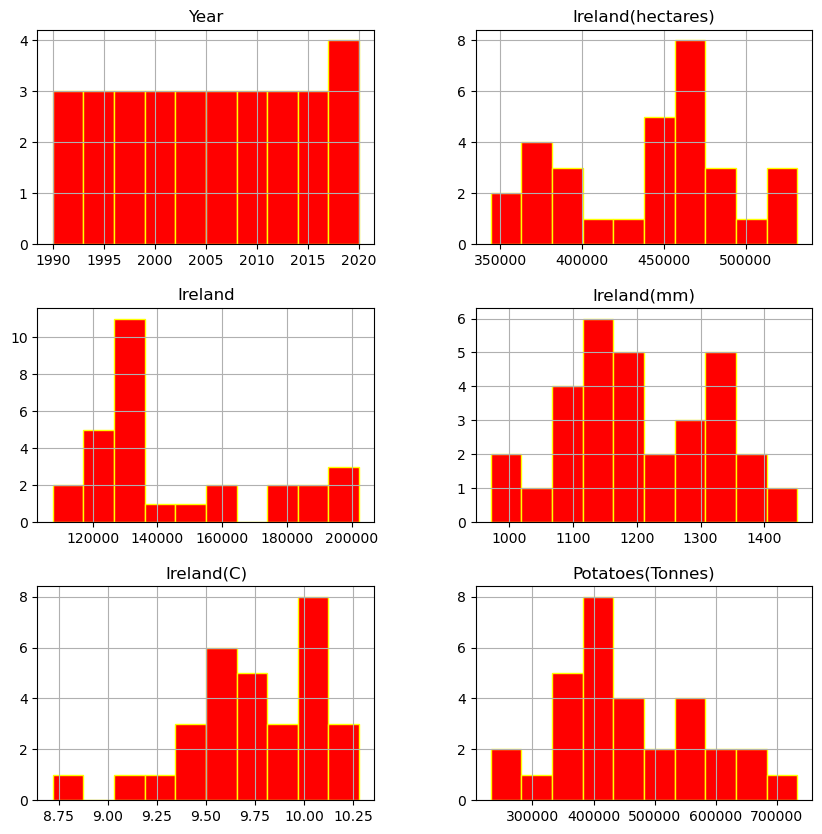

In [153]:
# 1.5.2 Producing Histogram for Datasets
# Producing Histogram for Each Variable of Ireland
ireland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow" );

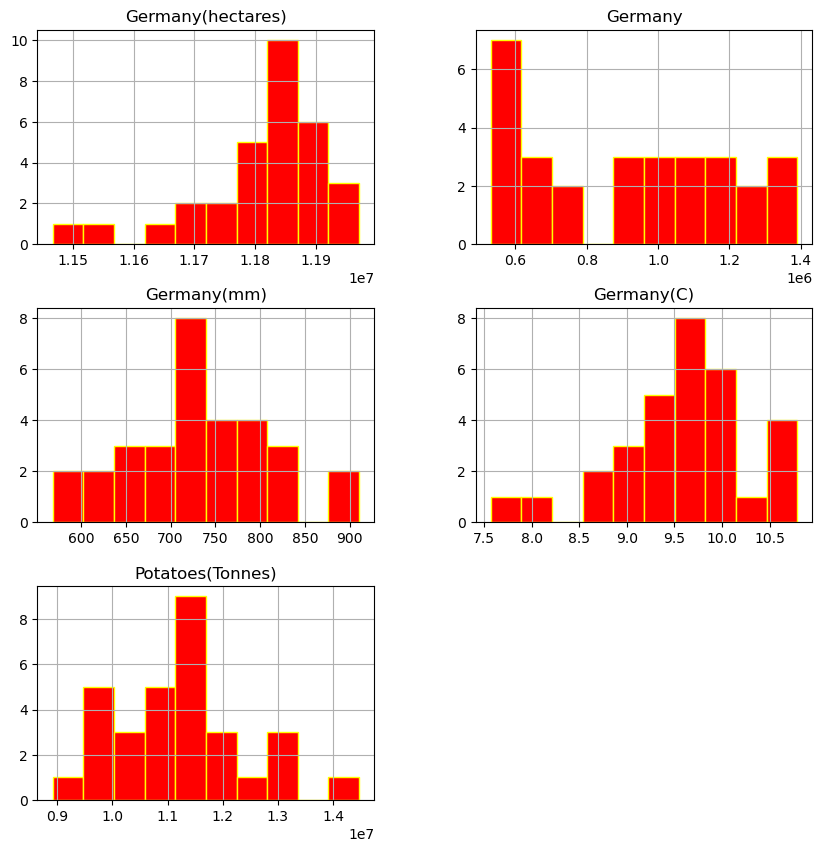

In [154]:
# Producing Histogram for Each Variable of Germany
germany_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

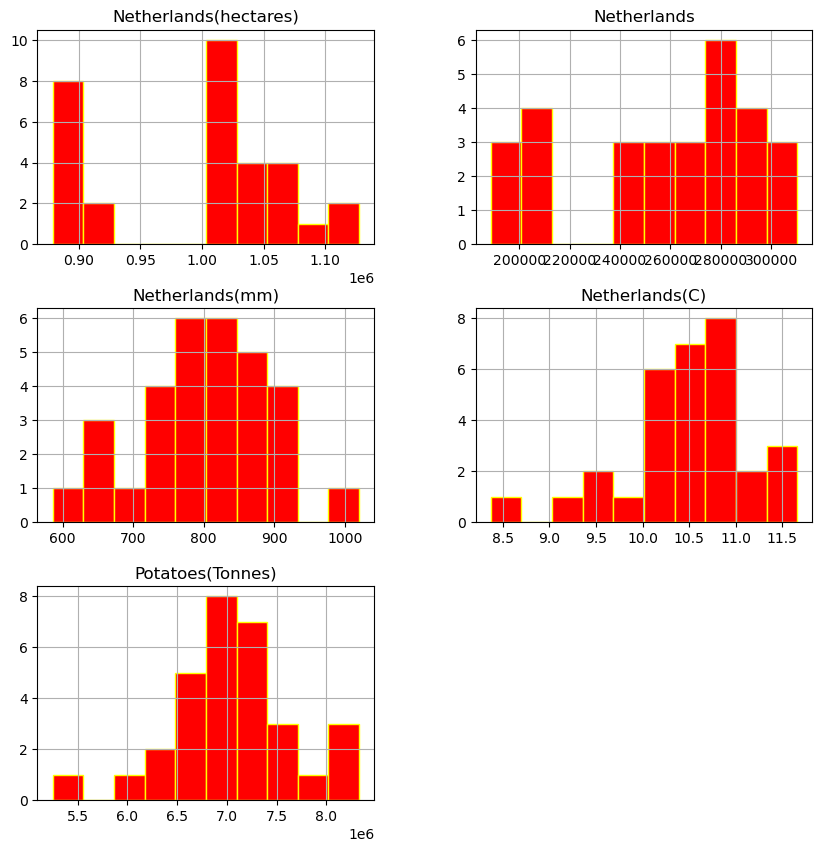

In [155]:
# Producing Histogram for Each Variable of Netherland
netherland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

#### Ireland Boxplots

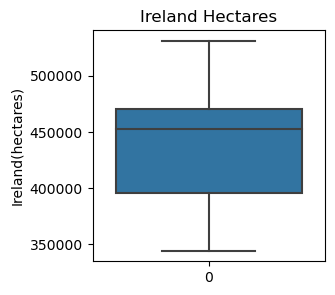

In [156]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares         = ireland_dataset["Ireland(hectares)"]
ireland          = ireland_dataset["Ireland"]
ireland_mm       = ireland_dataset["Ireland(mm)"]
ireland_c        = ireland_dataset["Ireland(C)"]
ireland_potatoes = ireland_dataset["Potatoes(Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Ireland Hectares")
plt.ylabel("Ireland(hectares)")
sns.boxplot(hectares);

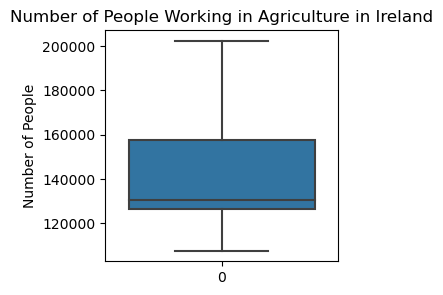

In [157]:
# 2. People who work in Ireland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("Number of People Working in Agriculture in Ireland")
plt.ylabel("Number of People")
sns.boxplot(ireland);

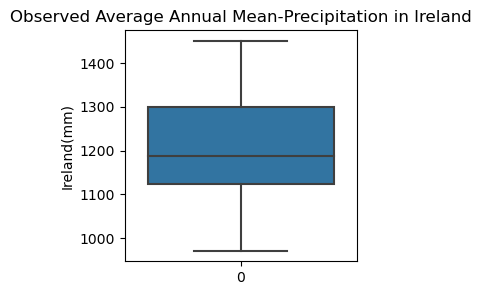

In [158]:
# 3. Observed Average Annual Mean Precipitation in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Ireland")
plt.ylabel("Ireland(mm)")
sns.boxplot(ireland_mm);

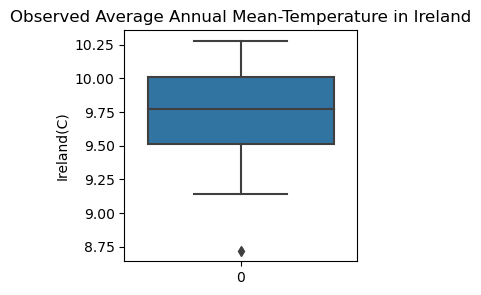

In [159]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Ireland")
plt.ylabel("Ireland(C)")
sns.boxplot(ireland_c);

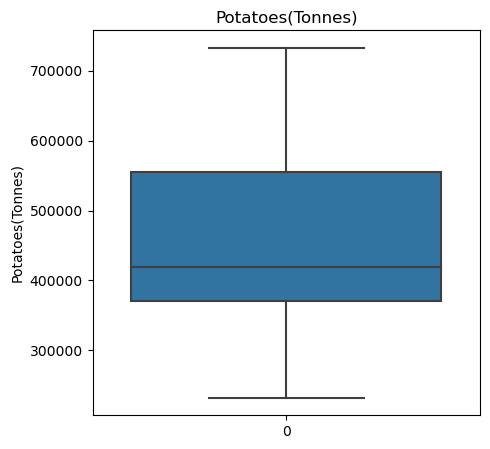

In [160]:
# 5. Ireland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Potatoes(Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(ireland_potatoes);

#### Germany Boxplots

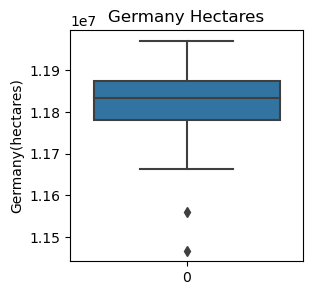

In [161]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
# 1. Germany Hectares
hectares1        = germany_dataset["Germany(hectares)"]
germany          = germany_dataset["Germany"]
germany_mm       = germany_dataset["Germany(mm)"]
germany_c        = germany_dataset["Germany(C)"]
germany_potatoes = germany_dataset["Potatoes(Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Germany Hectares")
plt.ylabel("Germany(hectares)")
sns.boxplot(hectares1);

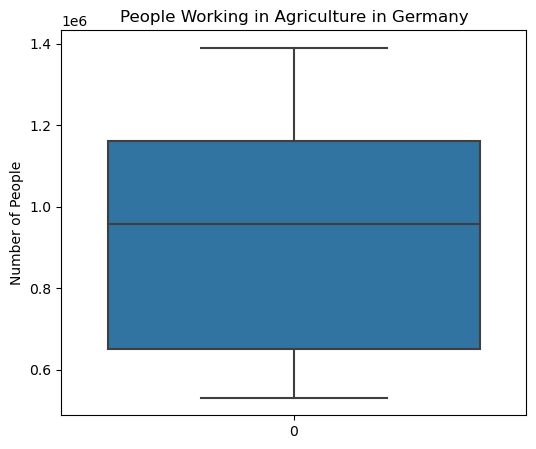

In [162]:
# 2. People who work in Germany Agriculture
fig = plt.figure(figsize =(6, 5))
plt.title("People Working in Agriculture in Germany")
plt.ylabel("Number of People")
sns.boxplot(germany);

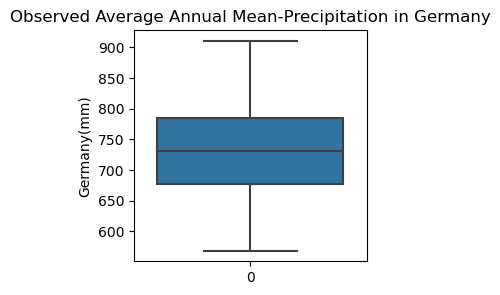

In [163]:
# 3. Observed Average Annual Mean Precipitation in Germany
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Germany")
plt.ylabel("Germany(mm)")
sns.boxplot(germany_mm);

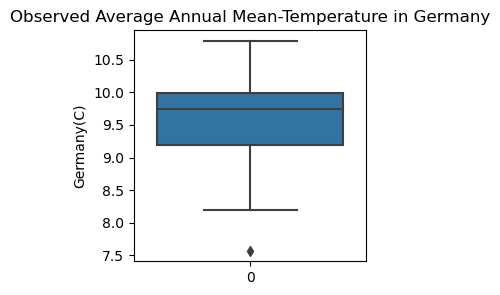

In [164]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Germany")
plt.ylabel("Germany(C)")
sns.boxplot(germany_c);


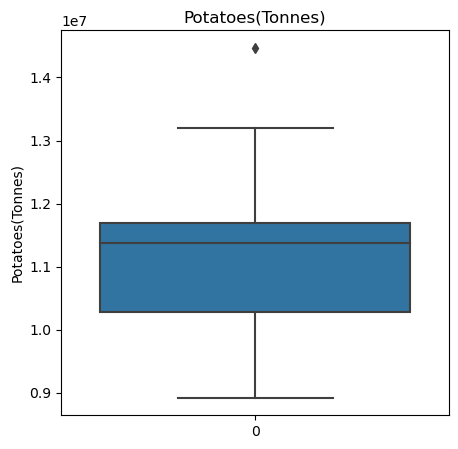

In [165]:
# 5. Germany Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Potatoes(Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(germany_potatoes);

#### Netherland Boxplots

In [166]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares2           = netherland_dataset["Netherlands(hectares)"]
netherland          = netherland_dataset["Netherlands"]
netherland_mm       = netherland_dataset["Netherlands(mm)"]
netherland_c        = netherland_dataset["Netherlands(C)"]
netherland_potatoes = netherland_dataset["Potatoes(Tonnes)"]

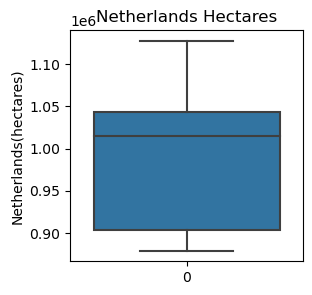

In [167]:
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Netherlands Hectares")
plt.ylabel("Netherlands(hectares)")
sns.boxplot(hectares2);

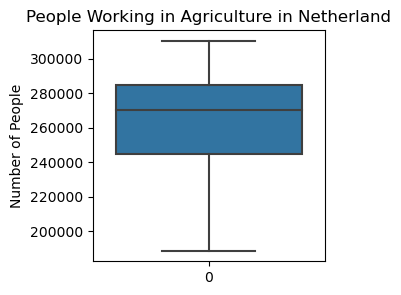

In [168]:
# 2. People who work in Netherland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("People Working in Agriculture in Netherland")
plt.ylabel("Number of People")
sns.boxplot(netherland);

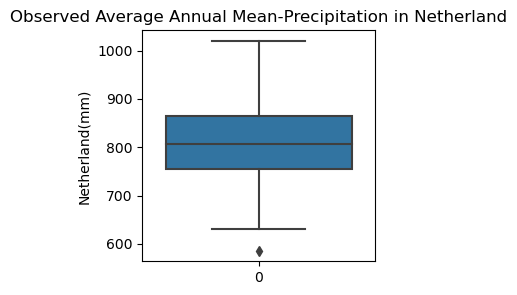

In [169]:
# 3. Observed Average Annual Mean Precipitation in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Netherland")
plt.ylabel("Netherland(mm)")
sns.boxplot(netherland_mm);

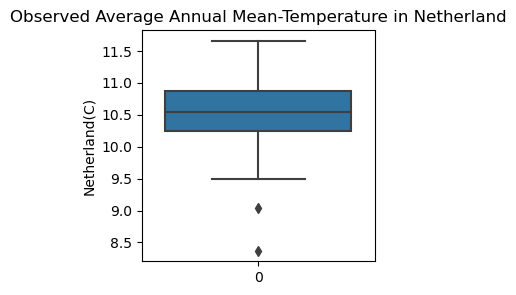

In [170]:
# 4. Observed Average Annual Mean-Temperature in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Netherland")
plt.ylabel("Netherland(C)")
sns.boxplot(netherland_c);

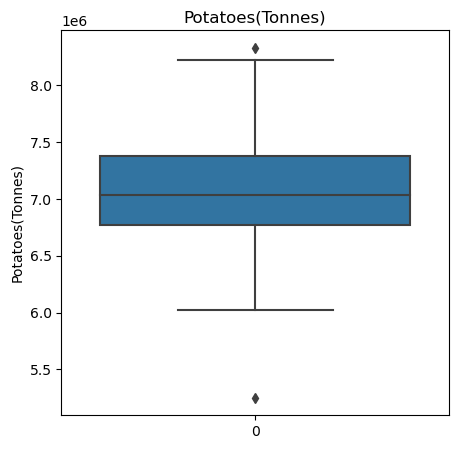

In [171]:
# 5. Netherland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Potatoes(Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(netherland_potatoes);

#### Skewness and Kurtosis

In [172]:
# Ireland Skewness
print("Ireland Dataset Skewness")
print("---------------------------------")
print(ireland_dataset.skew(axis = 0, skipna=True))

Ireland Dataset Skewness
---------------------------------
Year                 0.000000
Ireland(hectares)   -0.259119
Ireland              0.927390
Ireland(mm)          0.125509
Ireland(C)          -0.917392
Potatoes(Tonnes)     0.359197
dtype: float64


In [173]:
# Ireland Kurtosis
print("Ireland Dataset Kurtosis")
print("---------------------------------")
print(ireland_dataset.kurt(axis=0))

Ireland Dataset Kurtosis
---------------------------------
Year                -1.200000
Ireland(hectares)   -0.840105
Ireland             -0.591462
Ireland(mm)         -0.612021
Ireland(C)           1.304995
Potatoes(Tonnes)    -0.456339
dtype: float64


In [174]:
# Germany Skewness
print("Germany Dataset Skewness")
print("---------------------------------")
print(germany_dataset.skew(axis = 0, skipna = True))

Germany Dataset Skewness
---------------------------------
Germany(hectares)   -1.507499
Germany              0.084367
Germany(mm)         -0.002150
Germany(C)          -0.690212
Potatoes(Tonnes)     0.532707
dtype: float64


In [175]:
# Germany Kurtosis
print("Germany Dataset Kurtosis")
print("---------------------------------")
print(germany_dataset.kurt(axis=0))

Germany Dataset Kurtosis
---------------------------------
Germany(hectares)    2.933921
Germany             -1.375508
Germany(mm)          0.204451
Germany(C)           1.189728
Potatoes(Tonnes)     0.612444
dtype: float64


In [46]:
# Netherland Skewness
print("Netherland Dataset Skewness")
print("---------------------------------")
print(netherland_dataset.skew(axis = 0, skipna = True))

Netherland Dataset Skewness
---------------------------------
Netherlands(hectares)   -0.328114
Netherlands             -0.647296
Netherlands(mm)         -0.217814
Netherlands(C)          -0.999323
Potatoes(Tonnes)        -0.338224
dtype: float64


In [47]:
# Netherland Kurtosis
print("Netherland Dataset Kurtosis")
print("---------------------------------")
print(netherland_dataset.kurt(axis=0))

Netherland Dataset Kurtosis
---------------------------------
Netherlands(hectares)   -1.191318
Netherlands             -0.865510
Netherlands(mm)          0.063332
Netherlands(C)           1.815575
Potatoes(Tonnes)         1.219660
dtype: float64


#### 1.6  Inferential Statistics Process
In this section, the distribution of the data will be plotted, the standard error value will be found, the Z score will be calculated.

**Ireland Dataset Each Columns Distribution**

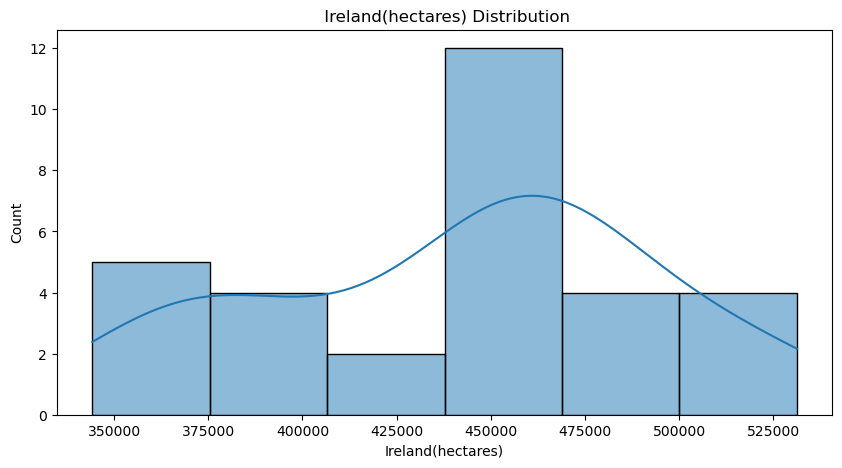

In [48]:
# 1.
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(ireland_dataset['Ireland(hectares)'], kde=True).set(title=' Ireland(hectares) Distribution')

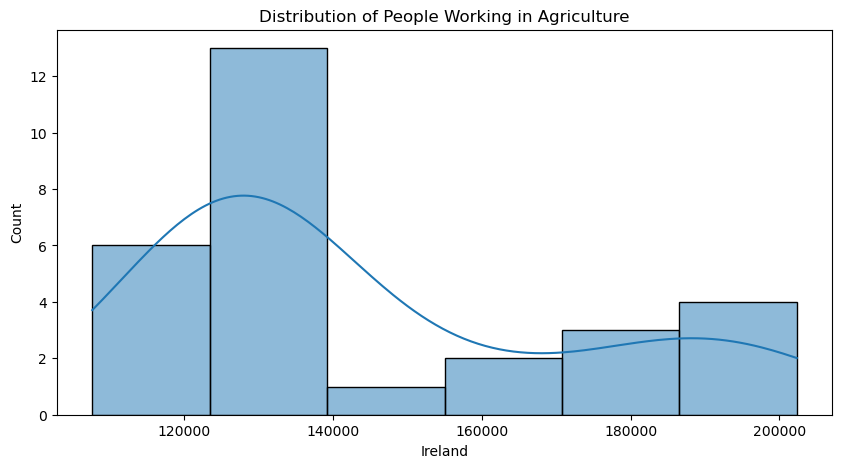

In [49]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(ireland_dataset['Ireland'], kde=True).set(title="Distribution of People Working in Agriculture")

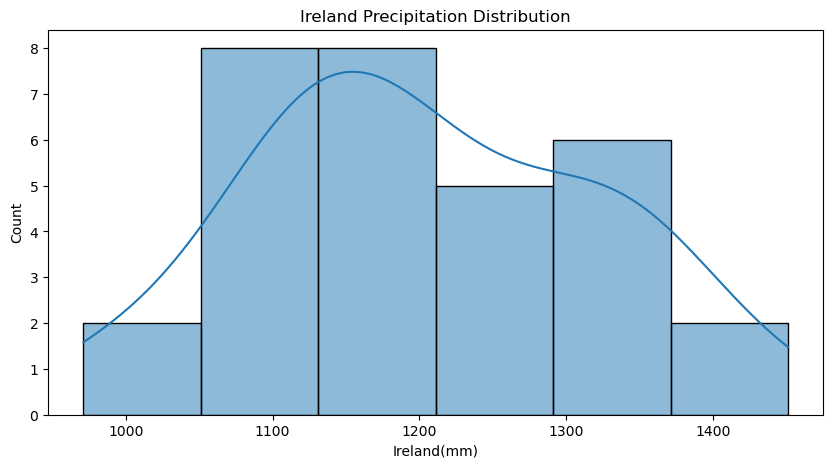

In [50]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(ireland_dataset["Ireland(mm)"], kde=True).set(title="Ireland Precipitation Distribution")

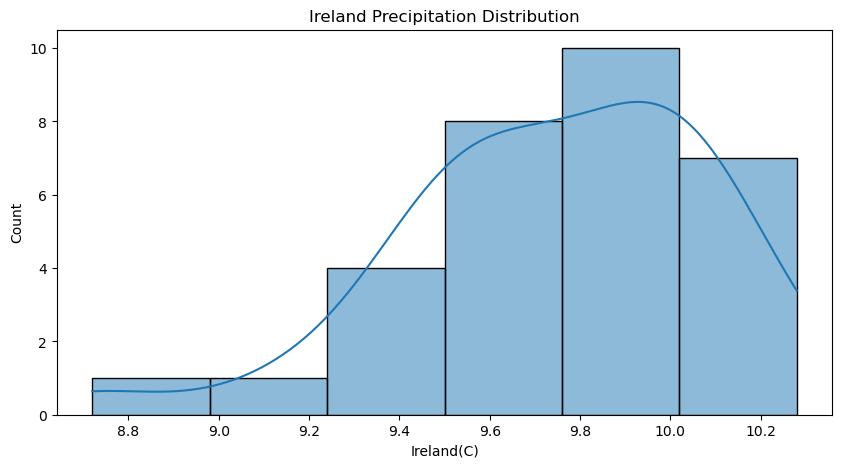

In [51]:
# 4
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(ireland_dataset["Ireland(C)"], kde=True).set(title="Ireland Precipitation Distribution")

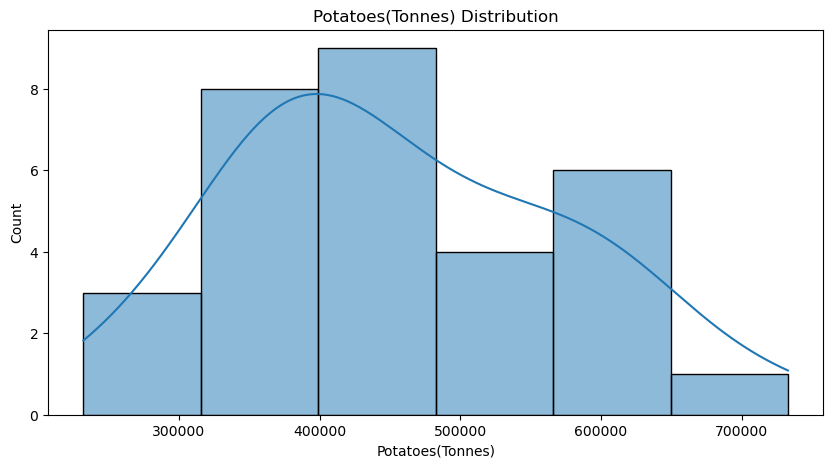

In [52]:
# 5
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(ireland_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes) Distribution")

**Germany Dataset Each Columns Distribution**

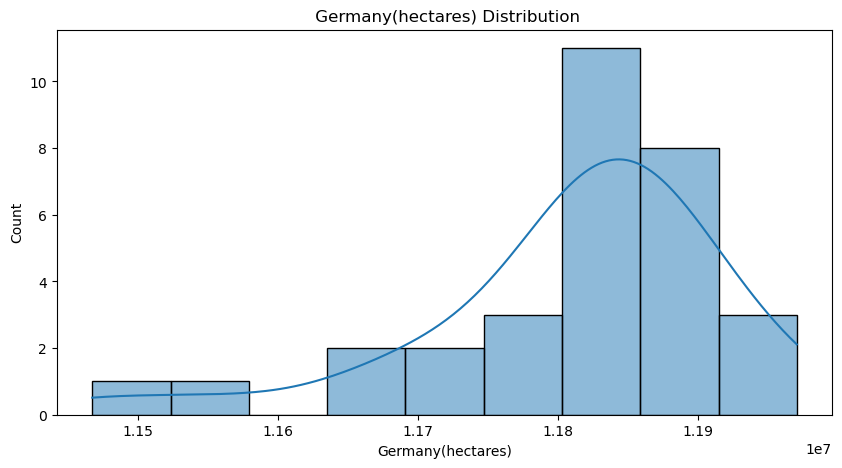

In [53]:
# 1
plt.figure(figsize=(10,5))
graphHectares_de = sns.histplot(germany_dataset['Germany(hectares)'], kde=True).set(title=' Germany(hectares) Distribution')

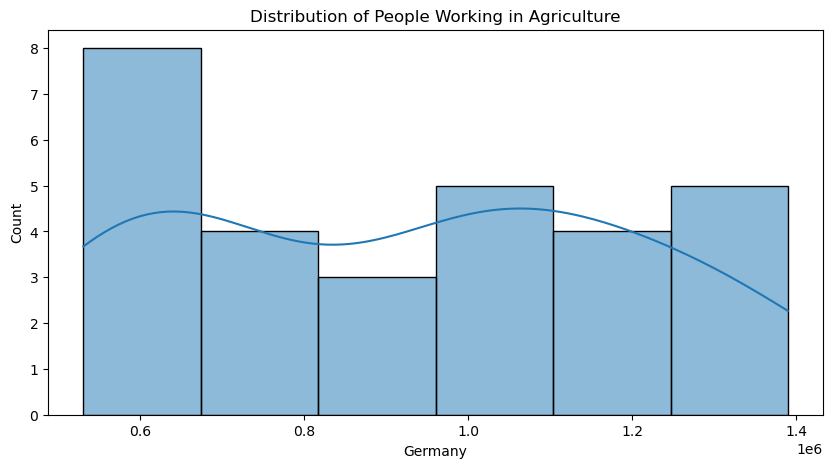

In [54]:
# 2
plt.figure(figsize=(10,5))
graphGermany = sns.histplot(germany_dataset['Germany'], kde=True).set(title="Distribution of People Working in Agriculture")

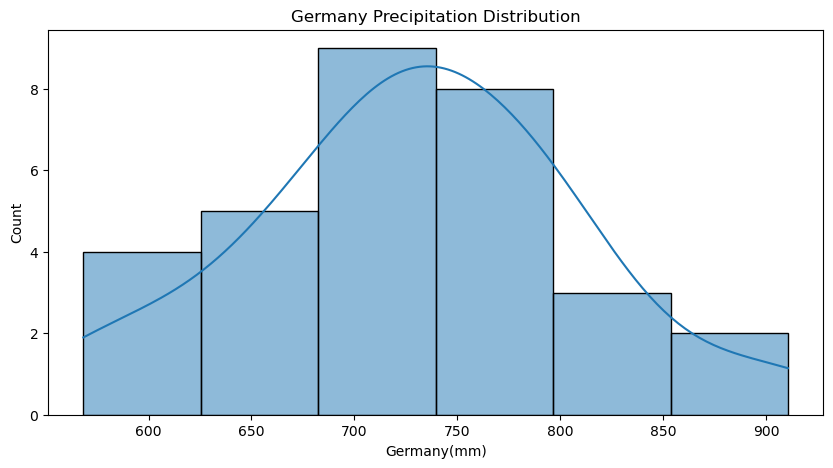

In [55]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation1 = sns.histplot(germany_dataset["Germany(mm)"], kde=True).set(title="Germany Precipitation Distribution")

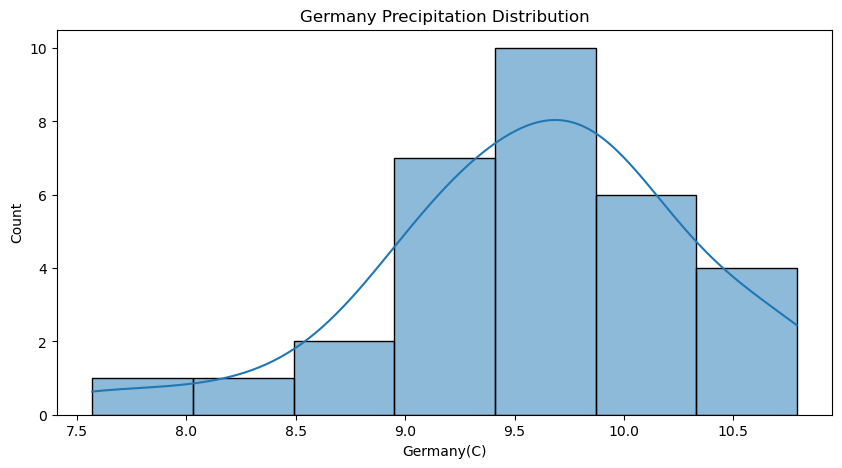

In [56]:
# 4
plt.figure(figsize=(10,5))
graphTemperature1 = sns.histplot(germany_dataset["Germany(C)"], kde=True).set(title="Germany Precipitation Distribution")

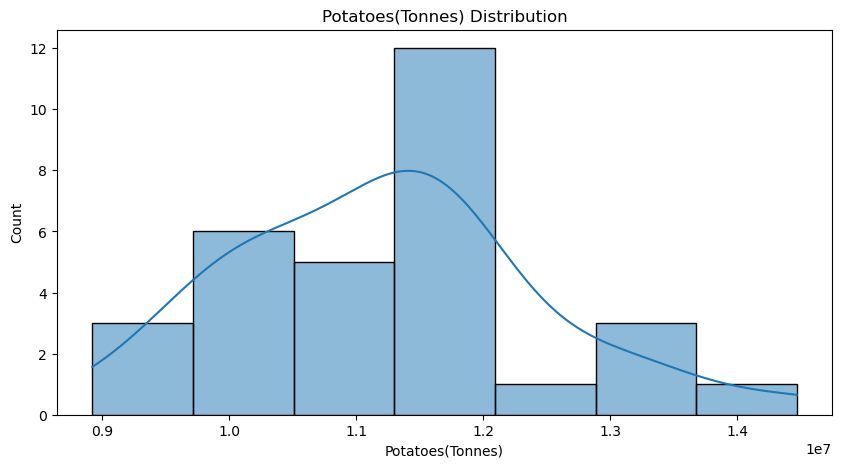

In [57]:
# 5
plt.figure(figsize=(10,5))
graphTonnes1 = sns.histplot(germany_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes) Distribution")

**Netherland Dataset Each Columns Distribution**

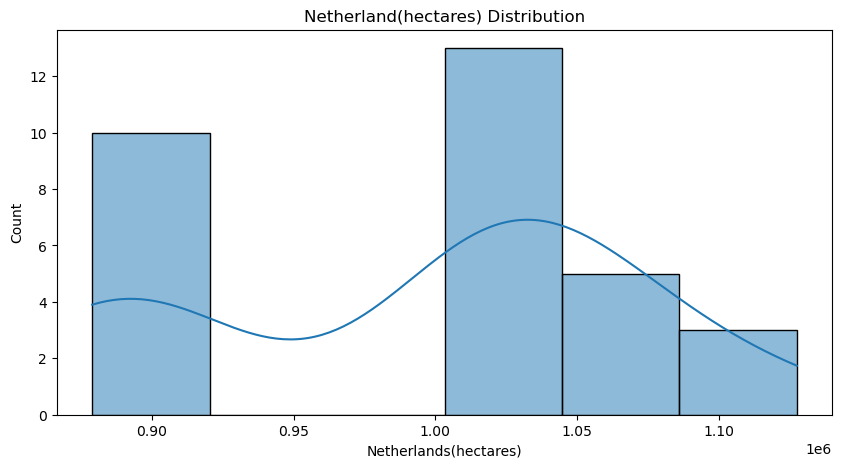

In [58]:
1
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(netherland_dataset['Netherlands(hectares)'], kde=True).set(title='Netherland(hectares) Distribution')

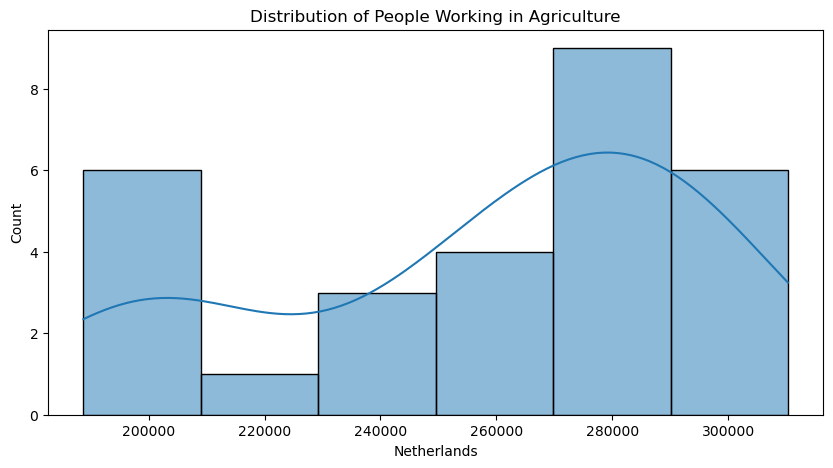

In [59]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(netherland_dataset['Netherlands'], kde=True).set(title="Distribution of People Working in Agriculture")

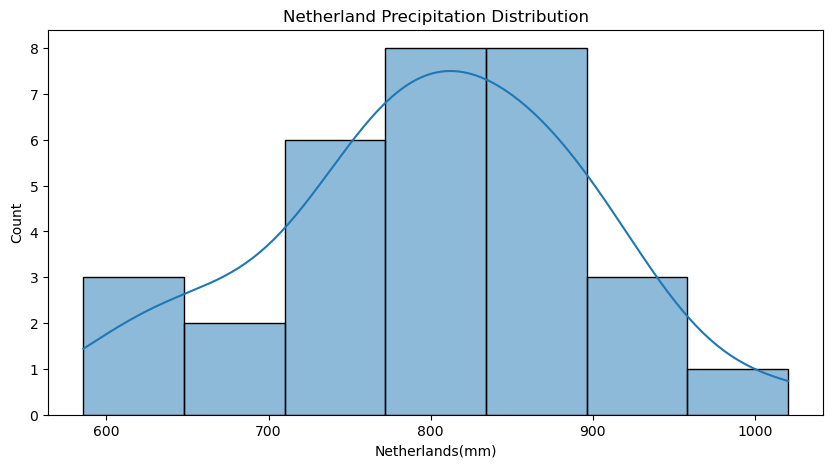

In [60]:
# 3.
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(netherland_dataset["Netherlands(mm)"], kde=True).set(title="Netherland Precipitation Distribution")

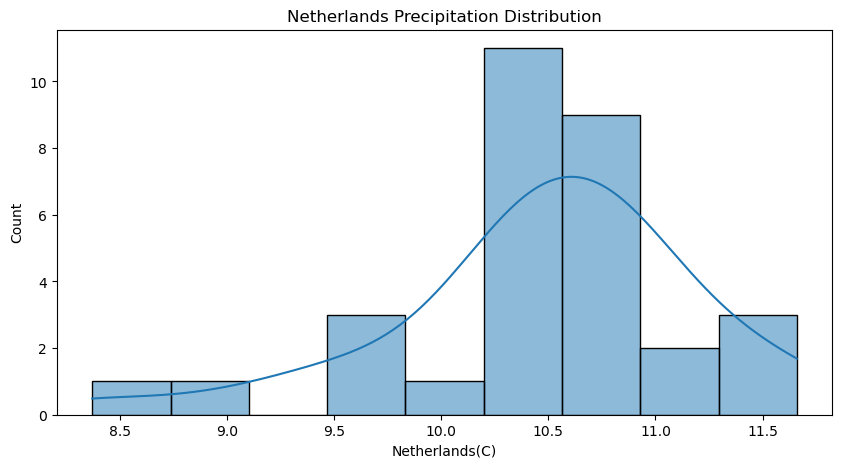

In [61]:
# 4.
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(netherland_dataset["Netherlands(C)"], kde=True).set(title="Netherlands Precipitation Distribution")

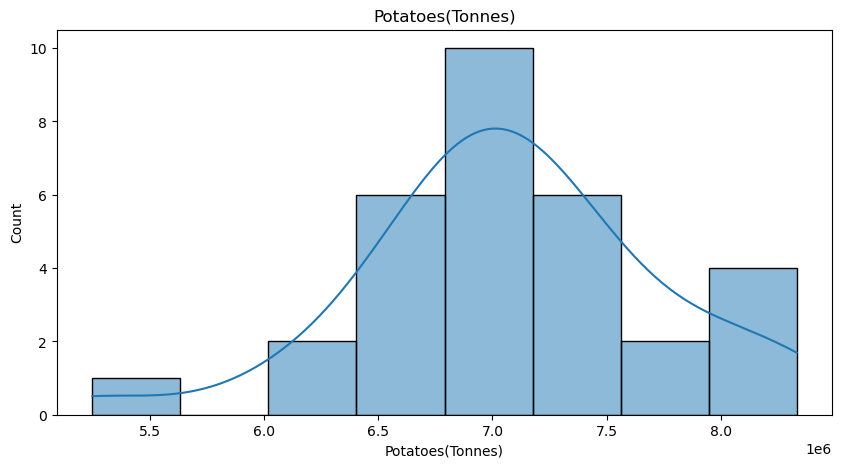

In [62]:
# 5.
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(netherland_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes)")

#### Statistical Analysis

In [63]:
# Datasets Here.
data1 = ireland_dataset["Potatoes(Tonnes)"].sample(n=30)
data2 = germany_dataset["Potatoes(Tonnes)"].sample(n=30)
data3 = netherland_dataset["Potatoes(Tonnes)"].sample(n=30)

#### Wilcoxon Test

In [64]:
# Wilcoxon Test for Ireland-Germany 
stat, p = wilcoxon(data1, data2, nan_policy="omit")
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


In [65]:
# Wilcoxon Test for Ireland-Netherland
stat, p = wilcoxon(data1, data3, nan_policy="omit")
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


#### One-Sample Hypothesis Test

In [66]:
# Ireland..
print("For Ireland..")
stat, p_ireland = ttest_1samp(data1, 0.8,nan_policy="omit")

# Test Result
print("Statistics=%.3f, p_ireland=%.3f" % (stat, p_ireland))

For Ireland..
Statistics=20.590, p_ireland=0.000


In [67]:
# Êvaluate P Value 
alpha = 0.05
if p_ireland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [68]:
# Germany..
print("For Germany")
stat, p_germany = ttest_1samp(data2, 0.8,nan_policy="omit")

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_germany=%.3f" % (stat, p_germany))

For Germany
Statistics=50.481, p_germany=0.000


In [69]:
# Êvaluate P Value 
alpha = 0.05
if p_germany > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [70]:
# Netherland..
print("For Netherland")
stat, p_netherland = ttest_1samp(data3, 0.8,nan_policy="omit")

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_netherland=%.3f" % (stat, p_netherland))

For Netherland
Statistics=59.019, p_netherland=0.000


In [71]:
# Êvaluate P Value 
alpha = 0.05
if p_netherland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


#### T-Test

In [72]:
# T-Test for Ireland-Germany..
stat, p = ttest_ind(data1, data2,nan_policy="omit")  # For ireland-germany
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=-48.176, p=0.000


In [73]:
# Evaluate P Value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

There is a significant difference between the median values ​​(H0 is rejected)


In [74]:
# T-Test for Ireland-Netherland
stat, p = ttest_ind(data1, data3,nan_policy="omit")  # For ireland-netherland
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=-54.263, p=0.000


In [75]:
# Evaluate P Value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

There is a significant difference between the median values ​​(H0 is rejected)


#### Analysis of Variance

In [76]:
# Anova for Ireland-Germany
stat, p = f_oneway(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=2320.962, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [77]:
# Anova for Ireland-Netherland
stat, p = f_oneway(data1, data3)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=2944.487, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


#### Mann-Whitney U

In [78]:
# For Ireland-Germany
statistic,p_value = mannwhitneyu(data1,data2,nan_policy="omit")
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 0.0
p-value: 3.019859359162157e-11


In [79]:
# For Ireland-Netherland
statistic,p_value = mannwhitneyu(data1,data3,nan_policy="omit")
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 0.0
p-value: 3.019859359162157e-11


#### Kolmogorov Smirnov Two Sample Test

In [80]:
# Ireland - Germany 
statistic,p_value = ks_2samp(data1,data2)
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 1.0
p-value: 1.6911233892144742e-17


In [81]:
# Ireland - Germany 
statistic,p_value = ks_2samp(data1,data3)
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 1.0
p-value: 1.6911233892144742e-17


#### Chi Square Test

In [82]:
from scipy.stats import chisquare
statistic,p_value= chisquare((data1,data2))
print("Statistic:\n",statistic)
print("p-value:\n",p_value)

Statistic:
 [10322670.31449823 10587180.62882271  9179290.33427093  7964197.33176512
  9872516.12580106 11055937.27055049  9328097.25508172  8823652.90898386
 10157926.87959046  9037188.31666846 10037538.43624558 10487182.15204627
 11666265.66121822 10226113.18830727 11581482.3680657  12319207.98826015
  8808053.2317323   9404104.38807058  8868465.65205143 10542675.55759774
 10508428.62104323  9516131.5508452  13448435.60682723  9674115.47976931
  9912187.32671159  8380111.46443449  8684628.09996003  8134198.10547531
 10519213.16682593  8385900.91009043]
p-value:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


#### Standart Error

In [83]:
from scipy.stats import sem
sem_1 = sem(data1)
sem_2 = sem(data2)
sem_3 = sem(data3)
print("SEM for Ireland Dataset..:",sem_1)
print("SEM for Germany Dataset..:",sem_2)
print("SEM for Netherland Dataset..:",sem_3)


SEM for Ireland Dataset..: 22260.845130591086
SEM for Germany Dataset..: 222106.04526607264
SEM for Netherland Dataset..: 119770.07798262285


#### Z Score

In [84]:
# Ireland.
stats.zscore(ireland_dataset, nan_policy="omit").head(5)

,Year,Ireland(hectares),Ireland,Ireland(mm),Ireland(C),Potatoes(Tonnes)
0,-1.677051,-1.155283,NaN,-0.148952,0.795331,1.256196
1,-1.565248,-1.389801,2.083037,-1.145075,-0.700741,0.969711
2,-1.453444,-1.897922,1.845481,-0.637108,-0.880270,1.534255
3,-1.341641,-1.507060,1.816780,0.221539,-1.388934,0.952859
4,-1.229837,-1.682948,1.685971,0.903861,-0.760584,1.567959


In [85]:
# Germany.
from scipy.stats import zscore
stats.zscore(germany_dataset, nan_policy="omit").head(5)

,Germany(hectares),Germany,Germany(mm),Germany(C),Potatoes(Tonnes)
0,1.520986,NaN,0.064354,0.303118,2.740417
1,-2.385315,1.692377,-1.578189,-1.241536,-0.872746
2,-3.257596,1.584266,0.075475,0.059978,-0.283792
3,-1.276001,1.476154,0.813975,-1.198629,0.869749
4,-0.052912,1.368043,0.760015,0.489048,-1.323245


In [86]:
# Netherland.
from scipy.stats import zscore
stats.zscore(netherland_dataset, nan_policy="omit").head(5)

,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Potatoes(Tonnes)
0,-1.509463,NaN,-0.724050,0.377557,-0.056979
1,-1.483190,1.084415,-1.469013,-1.383135,-0.194028
2,-1.404372,1.034355,0.156643,-0.127559,0.895757
3,-1.404372,0.939892,0.729547,-1.426431,0.986336
4,-1.430645,0.895273,0.933977,0.103351,0.024621


# <font color='red'>Section 2. Data Preparation</font>

#### 2.1 Finding Null Values

In [87]:
# 2.1.1 Ireland Dataset.. 

def missing_values_table(ireland_dataset):
    missing_value = ireland_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(ireland_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(ireland_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(ireland_dataset)

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Ireland,2,6.5


In [88]:
# 2.1.2 Germany Dataset

def missing_values_table(germany_dataset):
    missing_value = germany_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(germany_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(germany_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(germany_dataset)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Germany,2,6.5


In [89]:
# 2.1.3 Netherland Dataset

def missing_values_table(germany_dataset):
    missing_value = netherland_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(netherland_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(netherland_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(netherland_dataset)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Netherlands,2,6.5


#### 2.2 Missing Value in Dataset

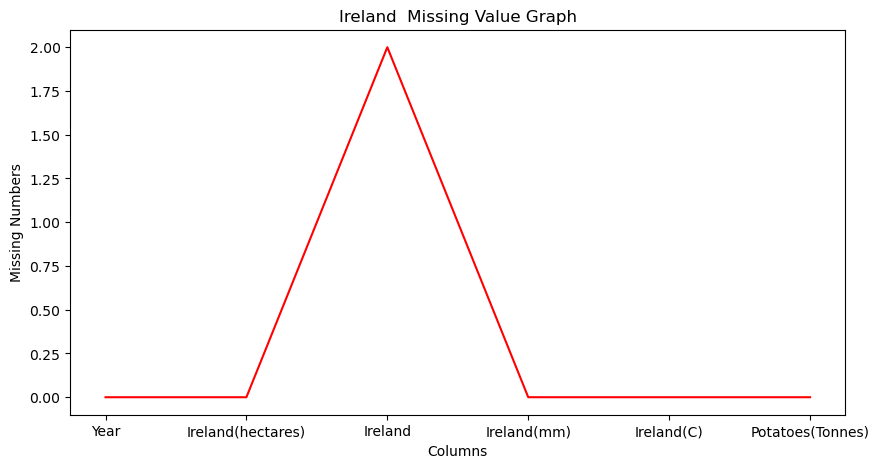

In [90]:
# 2.2.1 Draw Missing Data in Ireland..
plt.figure(figsize=(10,5))
ireland_dataset.isnull().sum().plot(color='r')

plt.title("Ireland  Missing Value Graph");
plt.ylabel("Missing Numbers");
plt.xlabel("Columns");


In [91]:
# 2.2.1.1 Solving the Missing Values Problem
ireland = ireland_dataset.iloc[:,2:3]
irelandMean = round(ireland.mean())

ireland_dataset1 = ireland_dataset.drop(["Ireland"], axis=1)
ireland1 = ireland.fillna(irelandMean)

# Dataset.
ireland_potatoes = pd.concat([ireland_dataset1,ireland1], axis=1)

# 2.2.1.2. Check Missing Values.
ireland_potatoes.isnull().sum()

Year                 0
Ireland(hectares)    0
Ireland(mm)          0
Ireland(C)           0
Potatoes(Tonnes)     0
Ireland              0
dtype: int64

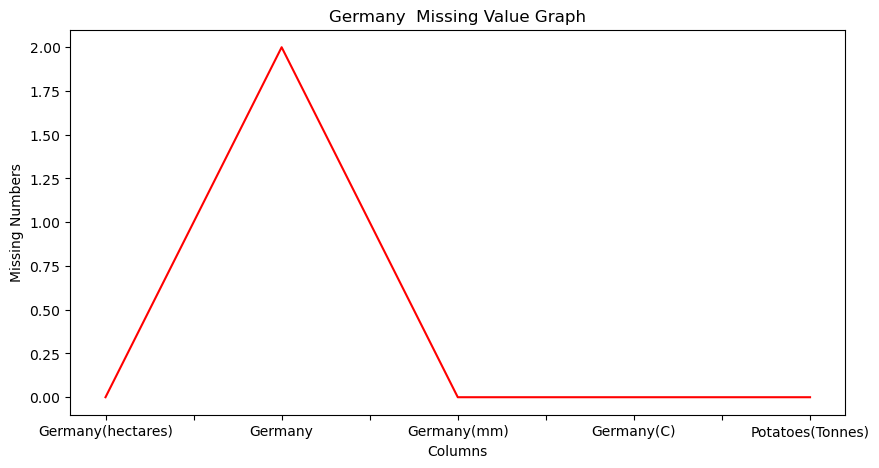

In [92]:
# 2.2.2 Draw Missing Data in Germany..
plt.figure(figsize=(10,5))
germany_dataset.isnull().sum().plot(color='r')

plt.title("Germany  Missing Value Graph")
plt.ylabel("Missing Numbers")
plt.xlabel("Columns");

In [93]:
# 2.2.2.1 Solving the Missing Values Problem
germany = germany_dataset.iloc[:,1:2]
germanyMean = germany.mean()

germany_dataset1 = germany_dataset.drop(["Germany"], axis=1)
germany1 = germany.fillna(germanyMean)

# Dataset.
germany_potatoes = pd.concat([germany_dataset1,germany1], axis=1)

# 2.2.1.2. Check Missing Values.
germany_potatoes.isnull().sum()

Germany(hectares)    0
Germany(mm)          0
Germany(C)           0
Potatoes(Tonnes)     0
Germany              0
dtype: int64

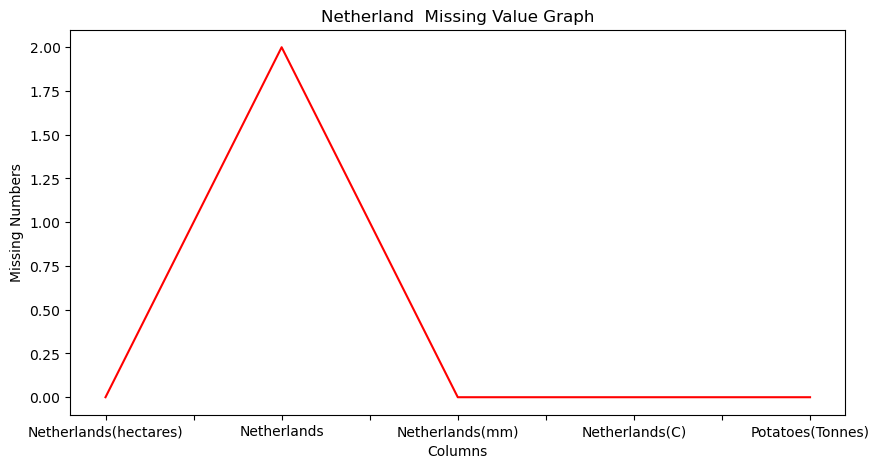

In [94]:
# 2.2.3 Draw Missing Data in Netherland.
plt.figure(figsize=(10,5))
netherland_dataset.isnull().sum().plot(color='r')

plt.title("Netherland  Missing Value Graph")
plt.ylabel("Missing Numbers")
plt.xlabel("Columns");

In [95]:
# 2.2.3.1 Solving the Missing Values Problem
netherland = netherland_dataset.iloc[:,1:2]
netherlandMean = netherland.mean()

netherland_dataset1 = netherland_dataset.drop(["Netherlands"], axis=1)
netherland1 = netherland.fillna(netherlandMean)

# Dataset.
netherland_potatoes = pd.concat([netherland_dataset1,netherland1], axis=1)

# 2.2.1.2. Check Missing Values.
netherland_potatoes.isnull().sum()

Netherlands(hectares)    0
Netherlands(mm)          0
Netherlands(C)           0
Potatoes(Tonnes)         0
Netherlands              0
dtype: int64

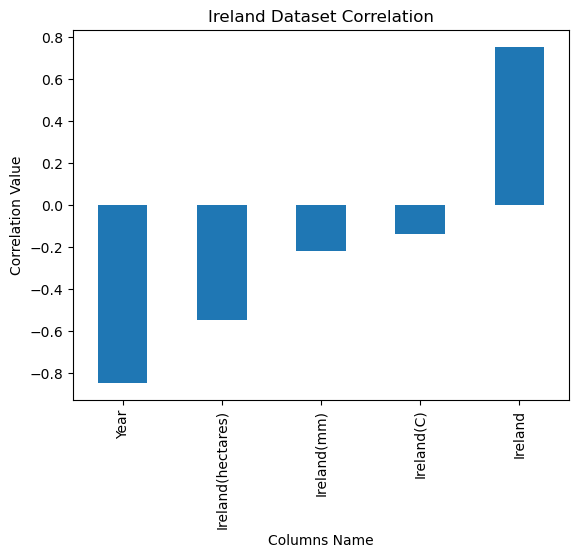

In [96]:
# Remember Correlation and Visualize It

# 1. For Ireland..
ireland_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Ireland Dataset Correlation");

Text(45.72222222222221, 0.5, 'Columns Name')

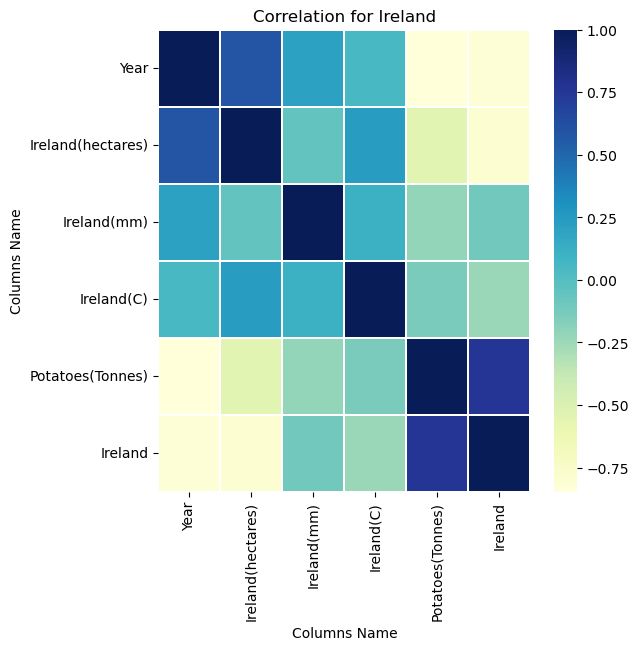

In [97]:
corrmat = ireland_potatoes.corr()
f, ax = plt.subplots(figsize =(6, 6))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Ireland')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

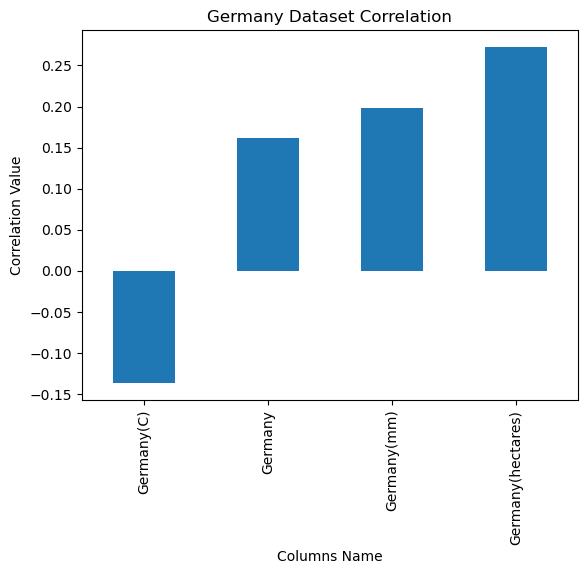

In [98]:
# 1. For Germany..
germany_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Germany Dataset Correlation");

Text(45.72222222222221, 0.5, 'Columns Name')

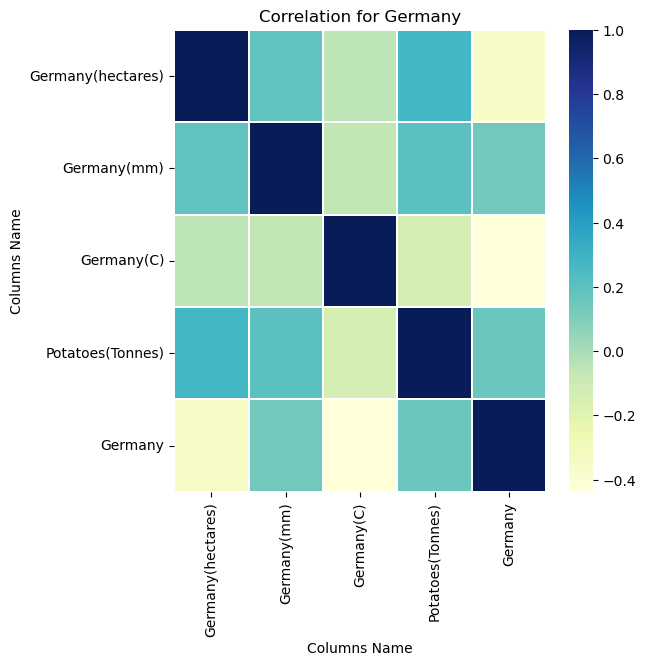

In [99]:
corrmat = germany_potatoes.corr()
f, ax = plt.subplots(figsize =(6, 6))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Germany')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

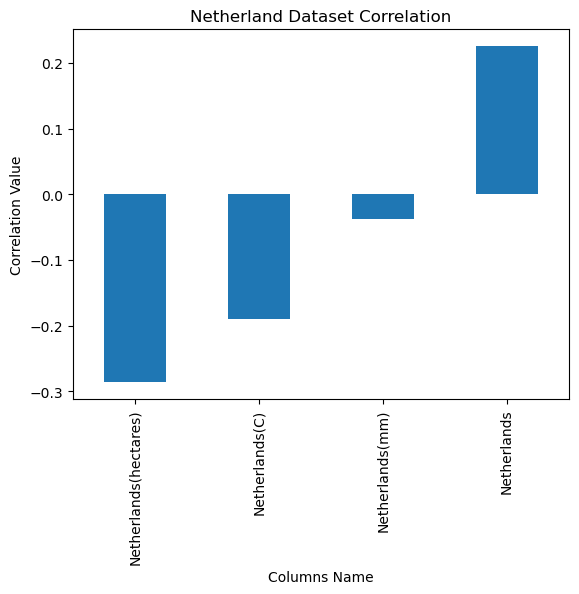

In [100]:
# 1. For Netherland..
netherland_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Netherland Dataset Correlation");

Text(45.72222222222221, 0.5, 'Columns Name')

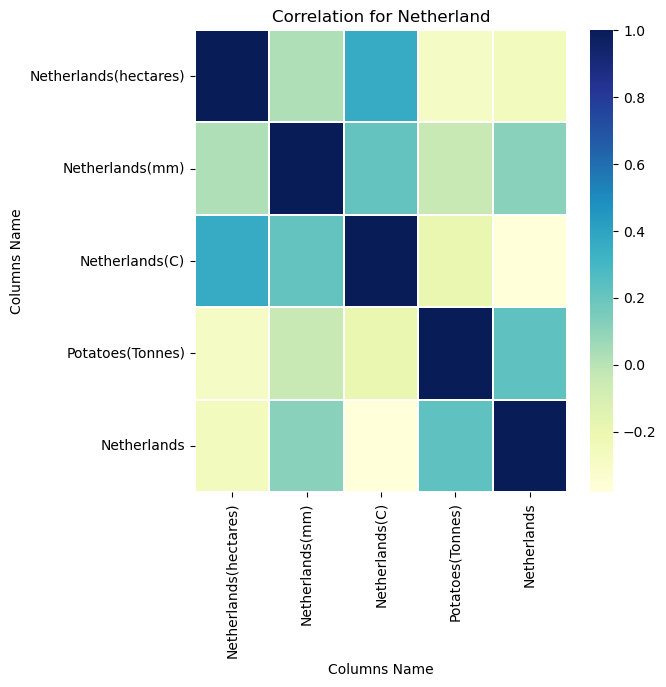

In [101]:
corrmat = netherland_potatoes.corr()
f, ax = plt.subplots(figsize =(6, 6))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Netherland')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

#### 2.3 Outlier Data Analysis

In [102]:
# 2.3.1 Germany Dataset..
anomaly = LocalOutlierFactor(n_neighbors=5)
anomaly_germany = anomaly.fit_predict(ireland_potatoes)

# 2.3.2 Show This Outlier.
ireland_potatoes[anomaly_germany == -1]

,Year,Ireland(hectares),Ireland(mm),Ireland(C),Potatoes(Tonnes),Ireland
6,1996,400200.0,1144.33,9.14,733000,179147.0
10,2000,391200.0,1284.66,9.63,454800,148559.0
11,2001,509200.0,971.09,9.55,477600,135541.0
13,2003,531230.0,999.65,10.02,488200,129773.0
22,2012,482610.0,1215.64,9.51,232000,129986.0
28,2018,451000.0,1206.47,9.70,273010,113789.0
30,2020,444000.0,1351.05,9.79,300150,144415.0


In [103]:
# 2.3.3 Germany Dataset..
anomaly = LocalOutlierFactor(n_neighbors=5)
anomaly_germany = anomaly.fit_predict(germany_potatoes)

# 2.3.4 Show This Outlier.
germany_potatoes[anomaly_germany == -1]

,Germany(hectares),Germany(mm),Germany(C),Potatoes(Tonnes),Germany
0,11971000.0,734.15,9.81,14471000.0,9.203789e+05
2,11467000.0,735.03,9.64,10896995.0,1.360000e+06
3,11676000.0,793.47,8.76,12260248.0,1.330000e+06
6,11835000.0,622.39,7.57,13099568.0,1.170000e+06
10,11804000.0,757.74,10.09,13192951.0,1.060000e+06
14,11898000.0,731.39,9.14,13043559.0,9.572140e+05
28,11731000.0,571.21,10.74,8920800.0,5.445290e+05


In [104]:
# 2.3.5 Germany Dataset..
anomaly = LocalOutlierFactor(n_neighbors=5)
anomaly_netherland = anomaly.fit_predict(netherland_potatoes)

# 2.3.6 Show This Outlier.
netherland_potatoes[anomaly_netherland == -1]

,Netherlands(hectares),Netherlands(mm),Netherlands(C),Potatoes(Tonnes),Netherlands
8,906000.0,1020.33,10.21,5249400.0,272609.0
28,1021000.0,633.68,11.40,6025370.0,193802.0


# <font color='red'> Section 3. Data Modeling</font> 


## <font color='red'> For Ireland..</font> 


#### 3.1a Decision Tree for Ireland Datasets 

In [105]:
# For Ireland..
dependent_values_ireland = ireland_potatoes.iloc[:,4:5]
list_columns = ["Potatoes(Tonnes)",("Year")]
independent_values_ireland = ireland_potatoes.drop(columns=list_columns)

X= independent_values_ireland
y= dependent_values_ireland.values

In [106]:
# Scaling.
scaler_ireland = StandardScaler()
X_ireland = scaler_ireland.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_ireland, y, test_size=0.3, random_state=0)

In [107]:
regressor_ireland = DecisionTreeRegressor(random_state=0)

# Fit te regressor to the training data
regressor_ireland.fit(X_train, y_train)

# Make predictions on the test data
prediction_ireland = regressor_ireland.predict(X_test)

# Calculate the mean squared error and r2 score
dT_mse_ireland = mean_squared_error(y_test, prediction_ireland)
dT_r2_ireland = r2_score(y_test, prediction_ireland)
dT_train_acc_ireland = regressor_ireland.score(X_train, y_train)
dT_test_acc_ireland = regressor_ireland.score(X_test, y_test)

print("Mean squared error:", dT_mse_ireland)
print("r2 score:", dT_r2_ireland)
print("Train accuracy:", dT_train_acc_ireland)
print("Test accuracy:", dT_test_acc_ireland)

Mean squared error: 5682966152.5
r2 score: 0.41623594984155066
Train accuracy: 1.0
Test accuracy: 0.41623594984155066


#### 3.2a Decision Tree Regression GridSearch CV

In [108]:
# Define the grid of hyperparameters to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
              'min_samples_split': [2, 4, 6, 8, 10,12,14,16,18,20],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10,12,14,16,20]}
# Create the decision tree regressor
gridSeach_regressor = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(gridSeach_regressor, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print(grid_search.best_params_)
print("Best score:", grid_search.best_score_)


{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.43242975534163647


In [109]:
# GridSearch Conf.
grid_search_reg = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1, min_samples_split=2)
grid_search_reg.fit(X_train, y_train)
y_pred_grid_reg = grid_search_reg.predict(X_test)

# Calculate the mean squared error and r2 score
GdT_gmse = mean_squared_error(y_test, y_pred_grid_reg)
GdT_r2 = r2_score(y_test, y_pred_grid_reg)
GdT_train_acc = grid_search_reg.score(X_train, y_train)
GdT_test_acc = grid_search_reg.score(X_test, y_test)
GdT_rmse = np.sqrt(GdT_gmse)

print("Mean squared error:", GdT_gmse)
print("r2 score:", GdT_r2)
print("Train accuracy:", GdT_train_acc)
print("Test accuracy:", GdT_test_acc)
print("RMSE:",GdT_rmse)

Mean squared error: 4762664818.527997
r2 score: 0.5107708845339529
Train accuracy: 0.8400651470949512
Test accuracy: 0.5107708845339529
RMSE: 69012.06284793983


In [110]:
DT_ireland_result_table = pd.DataFrame({"Model":["Decision Tree Regression"],
                            "MSE":[GdT_gmse],
                            "Train Accuracy":[GdT_train_acc],
                            "Test Accuracy":[GdT_test_acc],
                            "RMSE":[GdT_rmse],
                            "R2 Score":[GdT_r2],})
DT_ireland_result_table.head()

,Model,MSE,Train Accuracy,Test Accuracy,RMSE,R2 Score
0,Decision Tree Regression,4.762665e+09,0.840065,0.510771,69012.062848,0.510771


#### 3.3a Linear-Polynomial  Regression Data Preparation  for Ireland Datasets 

In [111]:
# Scaling.
scaler_ireland = StandardScaler()
independent_scaled = scaler_ireland.fit_transform(independent_values_ireland)

# PCA..
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state = 1000)

independent_pca = pca.fit_transform(independent_scaled)
print("Variance Explained Principal Component :")
pca.explained_variance_ratio_*100

Variance Explained Principal Component :


array([48.13710138])

Text(0.5, 1.0, 'Variability Explained')

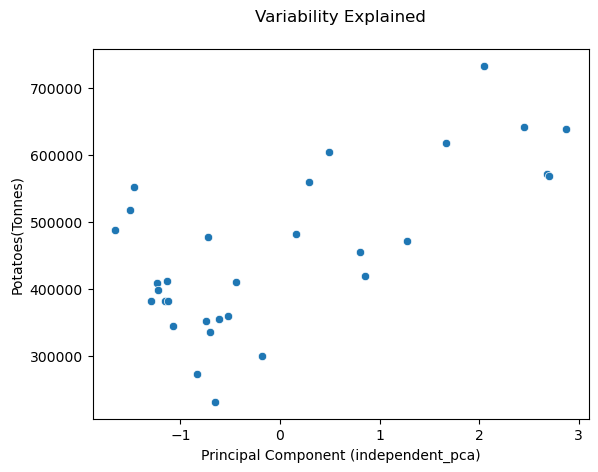

In [112]:
# Plot PCA 
sns.scatterplot(x=independent_pca.reshape(31,),y=ireland_potatoes["Potatoes(Tonnes)"])
plt.xlabel("Principal Component (independent_pca)")
plt.ylabel("Potatoes(Tonnes)")
plt.title("Variability Explained", pad=20)

#### 3.3a Lineer Regression

In [113]:
# Try Lineer Regression. 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

# Fit.
linear_regressor.fit(independent_pca,ireland_potatoes["Potatoes(Tonnes)"])
predict_linear = linear_regressor.predict(independent_pca)

# 
r_squared_linear = r2_score(ireland_potatoes["Potatoes(Tonnes)"],predict_linear)
mse_linear = mean_squared_error(ireland_potatoes["Potatoes(Tonnes)"],predict_linear)
rmse_linear = np.sqrt(mse_linear)


print("R Squared:",r_squared_linear)
print("RMSE:",rmse_linear)

R Squared: 0.44430766168404257
RMSE: 88469.73617926551


In [114]:
LR_result_table = pd.DataFrame({"Model":["Linear  Regression"],
                            "MSE":[mse_linear],
                            "RMSE":[rmse_linear],
                            "R2 Score":[r_squared_linear],})
LR_result_table.head()

,Model,MSE,RMSE,R2 Score
0,Linear Regression,7.826894e+09,88469.736179,0.444308


#### 3.4a Linear Regression GridsearchCV

In [115]:
param_grid = {'fit_intercept': [True, False],
              'positive': [True, False]}

grid_search_lr = GridSearchCV(linear_regressor, param_grid, cv=5)
grid_search_lr.fit(independent_pca,ireland_potatoes["Potatoes(Tonnes)"])
print(grid_search_lr.best_params_)

{'fit_intercept': True, 'positive': True}


In [116]:
# Define the grid of hyperparameters to search over
multi_reg_grid = LinearRegression(fit_intercept = True, positive = False)
multi_reg_grid.fit(X_train, y_train)
y_pred_multi_reg_grid = multi_reg_grid.predict(X_test)
multi_reg_result_grid = r2_score(y_test, y_pred_multi_reg_grid)


# Calculate the mean squared error and r2 score
GLr_mse = mean_squared_error(y_test, y_pred_multi_reg_grid)
Glr_r2 = r2_score(y_test, y_pred_multi_reg_grid)
Glr_train_acc = multi_reg_grid.score(X_train, y_train)
Glr_test_acc = multi_reg_grid.score(X_test, y_test)
Glr_rmse =  np.sqrt(GLr_mse)

print("Mean squared error:", GLr_mse)
print("r2 score:", Glr_r2)
print("Train accuracy:", Glr_train_acc)
print("Test accuracy:", Glr_test_acc)

Mean squared error: 4968540694.442675
r2 score: 0.48962296073345657
Train accuracy: 0.5910588209465593
Test accuracy: 0.48962296073345657


In [117]:
GrdLR_result_table = pd.DataFrame({"Model":["GridSearch Linear  Regression"],
                            "MSE":[GLr_mse],
                            "RMSE":[Glr_rmse],
                            "R2 Score":[Glr_r2],})
GrdLR_result_table.head()

,Model,MSE,RMSE,R2 Score
0,GridSearch Linear Regression,4.968541e+09,70487.876223,0.489623


#### 3.5a Polynomial  Regression for Ireland Dataset

In [118]:
# Try Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
independent_poly =poly_features.fit_transform(independent_pca)

# Fit.
rgr2= LinearRegression()
rgr2.fit(independent_poly,ireland_potatoes["Potatoes(Tonnes)"])
predict_poly = rgr2.predict(independent_poly)

# Evaluate.
r_squared_poly = r2_score(ireland_potatoes["Potatoes(Tonnes)"],predict_poly)
mse_poly = mean_squared_error(ireland_potatoes["Potatoes(Tonnes)"],predict_poly)
rmse_poly = np.sqrt(mse_linear)

print("R Squared:",r_squared_poly)
print("RMSE:",rmse_poly)

R Squared: 0.8472051258898199
RMSE: 88469.73617926551


In [119]:
all_regression_table_ireland = pd.DataFrame({"Model":["Linear Regression","GridSearch Linear Regression", "Polynomial Regression"],
                              "MSE":[mse_linear,GLr_mse,mse_poly],
                              "RMSE":[rmse_linear,Glr_rmse,rmse_poly],
                              "R2 Score":[r_squared_linear,Glr_r2,r_squared_poly]})
all_regression_table_ireland.head()

,Model,MSE,RMSE,R2 Score
0,Linear Regression,7.826894e+09,88469.736179,0.444308
1,GridSearch Linear Regression,4.968541e+09,70487.876223,0.489623
2,Polynomial Regression,2.152107e+09,88469.736179,0.847205


### All Result Table for Ireland ((1) Decision Tree, (2) Linear Regression, (3) Polynomial Regression)

In [147]:
print("For Ireland..")
all_result_table = pd.DataFrame({"Model":["Decision Tree Regression","Linear Regression","GridSearch Linear Regression", "Polynomial Regression"],
                              "MSE":[GdT_gmse,mse_linear,GLr_mse,mse_poly],
                              "RMSE":[GdT_rmse,rmse_linear,Glr_rmse,rmse_poly],
                              "R2 Score":[GdT_r2, r_squared_linear,Glr_r2,r_squared_poly]})
all_result_table.head()

For Ireland..


,Model,MSE,RMSE,R2 Score
0,Decision Tree Regression,4.762665e+09,69012.062848,0.510771
1,Linear Regression,7.826894e+09,88469.736179,0.444308
2,GridSearch Linear Regression,4.968541e+09,70487.876223,0.489623
3,Polynomial Regression,2.152107e+09,88469.736179,0.847205


## <font color='red'> For Germany..</font> 


#### 3.1b Decision Tree Regression for Germany Datasets 

In [148]:
# For Germany..
dependent_values_germany = germany_potatoes.iloc[:,4:5]
list_columns1 = ["Potatoes(Tonnes)"]
independent_values_germany = germany_potatoes.drop(columns=list_columns1)

X= independent_values_germany
y= dependent_values_germany.values

In [149]:
# Scaling.
scaler_germany = StandardScaler()
X = scaler_germany.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [150]:
regressor_germany = DecisionTreeRegressor(random_state=0)

# Fit te regressor to the training data
regressor_germany.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [151]:
# Make predictions on the test data
prediction_germany = regressor_germany.predict(X_test)

# Calculate the mean squared error and r2 score
dT_mse = mean_squared_error(y_test, prediction_germany)
dT_r2 = r2_score(y_test, prediction_germany)
dT_train_acc = regressor_germany.score(X_train, y_train)
dT_test_acc = regressor_germany.score(X_test, y_test)
dT_rmse = np.square(dT_mse)
print("Mean squared error:", dT_mse)
print("r2 score:", dT_r2)
print("Train accuracy:", dT_train_acc)
print("Test accuracy:", dT_test_acc)
print("RMSE:",dT_rmse)

Mean squared error: 1916155357.6
r2 score: 0.9736570793269729
Train accuracy: 1.0
Test accuracy: 0.9736570793269729
RMSE: 3.6716513544591836e+18


#### 3.2b Decision Tree Regression GridSearch CV

In [152]:
# Define the grid of hyperparameters to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
# Create the decision tree regressor
gridSeach_regressor = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(gridSeach_regressor, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print(grid_search.best_params_)
print("Best score:", grid_search.best_score_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9539627307738477


In [153]:
# GridSearch Conf.
grid_search_reg = DecisionTreeRegressor(max_depth=2,min_samples_leaf=2, min_samples_split=4)
grid_search_reg.fit(X_train, y_train)
y_pred_grid_reg = grid_search_reg.predict(X_test)

In [154]:
# Calculate the mean squared error and r2 score
Gdt_mse = mean_squared_error(y_test, y_pred_grid_reg)
Gdt_r2 = r2_score(y_test, y_pred_grid_reg)
Gdt_train_acc = grid_search_reg.score(X_train, y_train)
Gdt_test_acc = grid_search_reg.score(X_test, y_test)
Gdt_rmse = np.sqrt(Gdt_mse)

print("Mean squared error:", Gdt_mse)
print("r2 score:", Gdt_r2)
print("Train accuracy:", Gdt_train_acc)
print("Test accuracy:", Gdt_test_acc)
print("RMSE:",Gdt_rmse)

Mean squared error: 4543194381.771019
r2 score: 0.9375410721649219
Train accuracy: 0.9451477175292139
Test accuracy: 0.9375410721649219
RMSE: 67403.22233967022


In [155]:
# Result Table..
result_table = pd.DataFrame({"Model":["Decision Tree Regression","GridSearch Decision Tree Regression"],
                            "MSE":[dT_mse,Gdt_mse],
                            "Train Accuracy":[dT_train_acc,Gdt_train_acc],
                            "Test Accuracy":[dT_test_acc,Gdt_test_acc],
                            "RMSE":[dT_rmse,Gdt_rmse],
                            "R2 Score":[dT_r2,Gdt_r2]})
result_table.head()

,Model,MSE,Train Accuracy,Test Accuracy,RMSE,R2 Score
0,Decision Tree Regression,1.916155e+09,1.000000,0.973657,3.671651e+18,0.973657
1,GridSearch Decision Tree Regression,4.543194e+09,0.945148,0.937541,6.740322e+04,0.937541


#### 3.3b Linear Regression Data Preparation for Germany Datasets

In [156]:
# For Germany..
dependent_values_germany = germany_potatoes.iloc[:,4:5]
list_columns = ["Potatoes(Tonnes)"]
independent_values_germany = germany_potatoes.drop(columns=list_columns)

In [157]:
# Scaling.
scaler_germany = StandardScaler()
independent_scaled = scaler_germany.fit_transform(independent_values_germany)

In [158]:
# PCA..
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1, random_state = 1000)

independent_pca_germany = pca1.fit_transform(independent_scaled)
print("Variance Explained Principal Component :")
pca1.explained_variance_ratio_*100

Variance Explained Principal Component :


array([38.62372364])

Text(0.5, 1.0, 'Variability Explained')

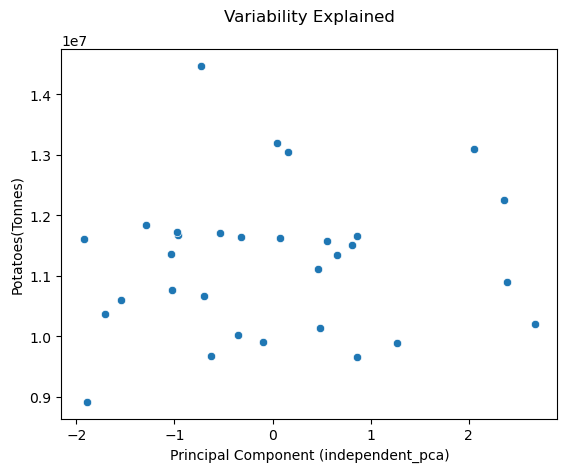

In [159]:
# Plot PCA 
sns.scatterplot(x=independent_pca_germany.reshape(31,),y=germany_potatoes["Potatoes(Tonnes)"])
plt.xlabel("Principal Component (independent_pca)")
plt.ylabel("Potatoes(Tonnes)")
plt.title("Variability Explained", pad=20)

#### 3.4b Lineer Regression

In [160]:
# Try Lineer Regression. 
from sklearn.linear_model import LinearRegression
linear_regressor_germany = LinearRegression()

# Fit.
linear_regressor_germany.fit(independent_pca_germany,germany_potatoes["Potatoes(Tonnes)"])
predict_linear_germany = linear_regressor_germany.predict(independent_pca_germany)

In [161]:
# 
r_squared_linear1 = r2_score(germany_potatoes["Potatoes(Tonnes)"],predict_linear_germany)
mse_linear1 = mean_squared_error(germany_potatoes["Potatoes(Tonnes)"],predict_linear_germany)
rmse_linear1 = np.sqrt(mse_linear1)

print("R Squared:",r_squared_linear1)
print("RMSE:",rmse_linear1)

R Squared: 0.00869895504907292
RMSE: 1176646.7287208922


#### 3.5b Linear Regression GridsearchCV

In [175]:
param_grid = {'fit_intercept': [True, False],
              'positive': [True, False]}

grid_search_lr1 = GridSearchCV(linear_regressor_germany, param_grid, cv=5)
grid_search_lr1.fit(independent_pca_germany,germany_potatoes["Potatoes(Tonnes)"])
print(grid_search_lr1.best_params_)

# Define the grid of hyperparameters to search over
multi_reg_grid1 = LinearRegression(fit_intercept = True, positive = False)
multi_reg_grid1.fit(X_train, y_train)
y_pred_multi_reg_grid1 = multi_reg_grid1.predict(X_test)
multi_reg_result_grid1 = r2_score(y_test, y_pred_multi_reg_grid1)

{'fit_intercept': True, 'positive': True}


In [176]:
# Calculate the mean squared error and r2 score
Glr_mse = mean_squared_error(y_test, y_pred_multi_reg_grid1)
Glr_r2 = r2_score(y_test, y_pred_multi_reg_grid1)
Glr_train_acc_1 = multi_reg_grid1.score(X_train, y_train)
Glr_test_acc_1 = multi_reg_grid1.score(X_test, y_test)
Glr_rmse = np.square(Glr_mse)

In [177]:
print("Mean squared error:", Glr_mse)
print("r2 score:", Glr_r2)
print("Train accuracy:", Glr_train_acc_1)
print("Test accuracy:", Glr_test_acc_1)
print("RMSE ", np.sqrt(Glr_rmse))


Mean squared error: 2.846030702774449e-20
r2 score: 1.0
Train accuracy: 1.0
Test accuracy: 1.0
RMSE  2.846030702774449e-20


In [165]:
print("For Germany..")
all_result_table = pd.DataFrame({"Model":["GridSearch Decision Tree Regression","Linear Regression","GridSearch Linear Regression"],
                              "MSE":[Gdt_mse,mse_linear1,Glr_mse],
                              "RMSE":[Gdt_rmse,rmse_linear1,Glr_rmse],
                              "R2 Score":[Gdt_r2, r_squared_linear1,Glr_r2]})
all_result_table.head()

For Germany..


,Model,MSE,RMSE,R2 Score
0,GridSearch Decision Tree Regression,4.543194e+09,6.740322e+04,0.937541
1,Linear Regression,1.384498e+12,1.176647e+06,0.008699
2,GridSearch Linear Regression,2.846031e-20,8.099891e-40,1.000000


## <font color='red'> Panel Data Analysis..</font> 


In [166]:
# Panel Data..
df_panel = pd.read_csv("Ireland-Germany-Netherland PanelData.csv")
print(df_panel.head())

   Year  Country  Hectares  Precipitation  Temperature    People  \
0  1990        1  382200.0        1186.73        10.01  144415.0   
1  1991        1  370200.0        1070.58         9.51  202332.0   
2  1992        1  344200.0        1129.81         9.45  195727.0   
3  1993        1  364200.0        1229.93         9.28  194929.0   
4  1994        1  355200.0        1309.49         9.49  191292.0   

   Potatoes Tonnes  
0         605000.0  
1         571000.0  
2         638000.0  
3         569000.0  
4         642000.0  


In [174]:
# Library İnstall.
#pip install linearmodels

In [168]:
df_panel=df_panel.set_index(['Country','Year'])

In [169]:
y=df_panel.iloc[:,1]
x=df_panel.iloc[:,[0,2,3,4]]
x

Hectares  Temperature    People  Potatoes Tonnes
Country Year                                                   
1       1990   382200.0        10.01  144415.0         605000.0
        1991   370200.0         9.51  202332.0         571000.0
        1992   344200.0         9.45  195727.0         638000.0
        1993   364200.0         9.28  194929.0         569000.0
        1994   355200.0         9.49  191292.0         642000.0
...                 ...          ...       ...              ...
3       2016  1028000.0        10.65  204563.0        6534338.0
        2017  1037000.0        10.89  206817.0        7391881.0
        2018  1021000.0        11.40  193802.0        6025370.0
        2019  1011100.0        11.24  194979.0        6961230.0
        2020  1004830.0        11.66  258552.0        7020060.0

[93 rows x 4 columns]

In [170]:
# Scaling.
import numpy as np
x_log=np.log(x)
y_log=np.log(y)

In [171]:
# Add Constant.
import statsmodels.api as sm
x=sm.add_constant(x_log)

# Model.
from linearmodels import PanelOLS
fe_model=panel.PanelOLS(y_log,x,entity_effects=True).fit(cov_type='clustered',cluster_entity=True)

In [172]:
# Model Summary.
print(fe_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:          Precipitation   R-squared:                        0.0484
Estimator:                   PanelOLS   R-squared (Between):              0.7383
No. Observations:                  93   R-squared (Within):               0.0484
Date:                Thu, Jan 05 2023   R-squared (Overall):              0.5975
Time:                        21:16:43   Log-likelihood                    74.826
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.0939
Entities:                           3   P-value                           0.3648
Avg Obs:                       31.000   Distribution:                    F(4,86)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):         -1.443e+16
                            

In [173]:
# 
constant=fe_model.params
print(constant)

const              6.819846
Hectares          -0.041715
Temperature        0.310782
People             0.088339
Potatoes Tonnes   -0.084574
Name: parameter, dtype: float64


In [204]:
# Let's Interpret the P-Value.
panelOLS_Pval = [0.0032, 0.1018,0.0089,0.1961]

for i in panelOLS_Pval:
    if i> 0.01  and i<0.05:
        print(i,"Statistically Significant")
    if i> 0.001  and i<0.01:
        print(i,"Highly Statistically Significant")
    if i< 0.001:
        print(i,"There is a very high level of statistically significant difference.")
    else:
        pass

0.0032 Highly Statistically Significant
0.0089 Highly Statistically Significant


# GUI

In [177]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
import seaborn as sns # For Visualization
from scipy.stats import skew # For Skewness
from scipy import stats # For General Statistics
import pylab as p # For Skewness
from scipy.stats import kurtosis #For Kurtosis
from scipy import stats
from scipy.stats import chisquare
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor # AnomalyDetection
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #  Regressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
from tkinter import ttk
from PIL import ImageTk, Image
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
from PIL import Image,ImageTk
warnings.filterwarnings('ignore')



#%%  main window

window = tk.Tk()
window.geometry("1880x600") 
window.wm_title("Eren Bozkurt - CCT_CA2_2022-23")


frame_right= tk.Frame(window, width = 900, height = 600 ) 
frame_right.grid(row=0 , column=1 )

frame_left = tk.Frame(window, width = 280, height = 600 )
frame_left.grid(row=0, column=0)

frame_image = tk.Frame(window, width = 700, height = 600 )
frame_image.grid(row=0, column=2)

# Ana frameler üzerine label frameleri ekliyoruz

label_frame01 = tk.LabelFrame (frame_left, text="Filters", width= 270, height = 300 )
label_frame01.grid(row=0, column=0, padx=5) 

label_frame1 = tk.LabelFrame(frame_right, text = "Results",  width = 890, height = 600)
label_frame1.grid(row=0, column=1 , padx=5)

label_frame02 = tk.LabelFrame (frame_left, text="Filters", width= 270, height = 300 )
label_frame02.grid(row=1, column=0, padx=5) 

label_frameimage = tk.LabelFrame (frame_image, text="Panel Data", width= 690, height = 300 )
label_frameimage.grid(row=0, column=2, padx=5)




ireland_agriculture = ""
belgium_agriculture =""
netherlands_agriculture = ""
number_of_people = ""
germany_potatoes =""
X_train, X_test, y_train, y_test = "","","",""

"frame01"   

def OpenData():
    global ireland_dataset, germany_dataset, netherland_dataset , ireland_potatoes, germany_potatoes

    arable_land           = pd.read_csv("Countries Arable Lands - 1990-2020.csv")
    people_in_farm        = pd.read_csv("Number of People Working in Agriculture 1990-2020.csv")
    precipitation         = pd.read_csv("Observed Average Annual Mean-Precipitation - 1990-2020.csv")
    temperature           = pd.read_csv("Observed Average Annual Mean-Temperature-1990-2020.csv")
    agriculture_ie        = pd.read_csv("Irelands Agriculture Data -1990-2020.csv")
    agriculture_de        = pd.read_csv("Germany_s-Agriculture-Data-1990-2020.csv")
    agriculture_nl        = pd.read_csv("Netherland_s-Agriculture-Data-1990-2020.csv")
    potatoes_ie           = agriculture_ie.iloc[:,3:4]
    potatoes_de           = agriculture_de.iloc[:,3:4]
    potatoes_nl           = agriculture_nl.iloc[:,3:4]
    
    # Each dataset has a "year" column. So, it is dropped to avoid confusion.
    people_in_farm        = people_in_farm.drop(["Year"], axis=1) 
    precipitation         = precipitation.drop(["Year"],axis=1)
    temperature           = temperature.drop(["Year"], axis=1) 
        
    # 1.3.1 Ireland Dataset Prepared
    year_hectar_ireland    = arable_land.iloc[:,0:2]
    people_farm_ireland    = people_in_farm.iloc[:,0:1]
    precipitation_ireland  = precipitation.iloc[:,0:1]
    temperature_ireland    = temperature.iloc[:,0:1]
    
    columns_ireland = [year_hectar_ireland, people_farm_ireland, precipitation_ireland,temperature_ireland,potatoes_ie]
    ireland_dataset = pd.concat((columns_ireland),axis=1)
    
    # 1.3.2 Germany Dataset Prepared
    year_hectar_germany     = arable_land.iloc[:,2:3]
    people_farm_germany     = people_in_farm.iloc[:,1:2]
    precipitation_germany   = precipitation.iloc[:,1:2]
    temperature_germany     = temperature.iloc[:,1:2]
    
    columns_germany  = [year_hectar_germany,people_farm_germany,precipitation_germany,temperature_germany,potatoes_de]
    germany_dataset  = pd.concat((columns_germany),axis=1)
    
    # 1.3.3 Netherland Dataset Prepared
    year_hectar_netherland     = arable_land.iloc[:,3:4]
    people_farm_netherland     = people_in_farm.iloc[:,2:3]
    precipitation_netherland   = precipitation.iloc[:,2:3]
    temperature_netherland     = temperature.iloc[:,2:3]
    
    columns_netherland  = [year_hectar_netherland,people_farm_netherland,precipitation_netherland,temperature_netherland,potatoes_nl]
    netherland_dataset  = pd.concat((columns_netherland),axis=1)
        
    # missing values
    
    """ Ireland """
    ireland = ireland_dataset.iloc[:,2:3]
    irelandMean = round(ireland.mean())
    
    ireland_dataset1 = ireland_dataset.drop(["Ireland"], axis=1)
    ireland1 = ireland.fillna(irelandMean)
    
    # Dataset.
    ireland_potatoes = pd.concat([ireland_dataset1,ireland1], axis=1)
    
    """ Germany """
    germany = germany_dataset.iloc[:,1:2]
    germanyMean = germany.mean()
    
    germany_dataset1 = germany_dataset.drop(["Germany"], axis=1)
    germany1 = germany.fillna(germanyMean)
    
    # Dataset.
    germany_potatoes = pd.concat([germany_dataset1,germany1], axis=1)
    
    """ Netherlands """
    netherland = netherland_dataset.iloc[:,1:2]
    netherlandMean = netherland.mean()
    
    netherland_dataset1 = netherland_dataset.drop(["Netherlands"], axis=1)
    netherland1 = netherland.fillna(netherlandMean)
    
    # Dataset.
    netherland_potatoes = pd.concat([netherland_dataset1,netherland1], axis=1)

    text1 = tk.Label(label_frame01, text="Countries Arable Lands - 1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*4)
    text2 = tk.Label(label_frame01, text="Number of People Working in Agriculture 1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*5)
    text3 = tk.Label(label_frame01, text="Observed Average Annual Mean-Precipitation - 1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*6)
    text4 = tk.Label(label_frame01, text="Observed Average Annual Mean-Temperature-1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*7)
    text5 = tk.Label(label_frame01, text="Irelands Agriculture Data -1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*8)
    text6 = tk.Label(label_frame01, text="Germany_s-Agriculture-Data-1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*9)
    text7 = tk.Label(label_frame01, text="Netherland_s-Agriculture-Data-1990-2020.csv").place(relx = 0.04 , rely = aralik + 0.07*10)
 



aralik = 0.03

openDataButton = tk.Button(label_frame01, text= "Open Data Sets" , command=OpenData, width= 13 )        
openDataButton.place(relx = 0.04 , rely = aralik)




"frame02"
   
# Ireland
def decisionTree():
    global ireland_dataset, germany_dataset, netherland_dataset , ireland_potatoes, germany_potatoes, X_train, X_test, y_train, y_test 
    
    country = chartChoosen.get()
    if country == "Ireland":

        dependent_values_ireland = ireland_potatoes.iloc[:,4:5]
        list_columns = ["Potatoes(Tonnes)",("Year")]
        independent_values_ireland = ireland_potatoes.drop(columns=list_columns)
        
        X= independent_values_ireland
        y= dependent_values_ireland.values 
               
        # Scaling.
        scaler_ireland = StandardScaler()
        X_ireland = scaler_ireland.fit_transform(X)
        
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_ireland, y, test_size=0.3, random_state=0)        
        regressor_ireland = DecisionTreeRegressor(random_state=0)
        
        # Fit te regressor to the training data
        regressor_ireland.fit(X_train, y_train)
        
        # Make predictions on the test data
        prediction_ireland = regressor_ireland.predict(X_test)
        
        # Calculate the mean squared error and r2 score
        dT_mse_ireland = mean_squared_error(y_test, prediction_ireland)
        dT_r2_ireland = r2_score(y_test, prediction_ireland)
        dT_train_acc_ireland = regressor_ireland.score(X_train, y_train)
        dT_test_acc_ireland = regressor_ireland.score(X_test, y_test)        

        text = tk.Label(label_frame1, text= "Decision Tree Ireland").place(relx = 0.01 , rely = 0.01)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.01 , rely = 0.04)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.01 , rely = 0.07)
        text = tk.Label(label_frame1, text= dT_mse_ireland).place(relx = 0.2, rely =  0.07)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.01, rely = 0.1)    
        text = tk.Label(label_frame1, text= dT_r2_ireland).place(relx = 0.2, rely = 0.1)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.01, rely =  0.13)
        text = tk.Label(label_frame1, text= dT_train_acc_ireland).place(relx = 0.2, rely = 0.13)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx =0.01, rely =  0.16)
        text = tk.Label(label_frame1, text= dT_test_acc_ireland).place(relx = 0.2, rely =  0.16)


        # Grid Search
        
        param_grid = {'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
                      'min_samples_split': [2, 4, 6, 8, 10,12,14,16,18,20],
                      'min_samples_leaf': [1, 2, 4, 6, 8, 10,12,14,16,20]}
        # Create the decision tree regressor
        gridSeach_regressor = DecisionTreeRegressor()
        
        # Create the grid search object
        grid_search = GridSearchCV(gridSeach_regressor, param_grid, cv=5, return_train_score=True)
        grid_search.fit(X_train, y_train)
        # GridSearch Conf.
        grid_search_reg = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1, min_samples_split=2)
        grid_search_reg.fit(X_train, y_train)
        y_pred_grid_reg = grid_search_reg.predict(X_test)
        
        # Calculate the mean squared error and r2 score
        GdT_gmse = mean_squared_error(y_test, y_pred_grid_reg)
        GdT_r2 = r2_score(y_test, y_pred_grid_reg)
        GdT_train_acc = grid_search_reg.score(X_train, y_train)
        GdT_test_acc = grid_search_reg.score(X_test, y_test)
        GdT_rmse = np.sqrt(GdT_gmse)            

        text = tk.Label(label_frame1, text= "Decision Tree Grid Search Ireland").place(relx = 0.01 , rely = 0.20)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.01 , rely = 0.23)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.01 , rely = 0.26)
        text = tk.Label(label_frame1, text= GdT_gmse).place(relx = 0.2, rely =  0.26)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.01, rely = 0.29)    
        text = tk.Label(label_frame1, text= GdT_r2).place(relx = 0.2, rely = 0.29)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.01, rely =  0.32)
        text = tk.Label(label_frame1, text= GdT_train_acc).place(relx = 0.2, rely = 0.32)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx =0.01, rely =  0.35)
        text = tk.Label(label_frame1, text= GdT_test_acc).place(relx = 0.2 , rely =  0.35)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx = 0.01, rely =  0.38)
        text = tk.Label(label_frame1, text= GdT_rmse).place(relx = 0.2 , rely =  0.38)        

    elif country == "Germany":
        
        # For Germany..

        dependent_values_germany = germany_potatoes.iloc[:,4:5]
        list_columns1 = ["Potatoes(Tonnes)"]
        independent_values_germany = germany_potatoes.drop(columns=list_columns1)
        
        X= independent_values_germany
        y= dependent_values_germany.values
            
         # Scaling.
        scaler_germany = StandardScaler()
        X = scaler_germany.fit_transform(X)
        
         # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    
         
        regressor_germany = DecisionTreeRegressor(random_state=0)
        
         # Fit te regressor to the training data
        regressor_germany.fit(X_train, y_train)   
            
         # Make predictions on the test data
        prediction_germany = regressor_germany.predict(X_test)
        
         # Calculate the mean squared error and r2 score
        dT_mse = mean_squared_error(y_test, prediction_germany)
        dT_r2 = r2_score(y_test, prediction_germany)
        dT_train_acc = regressor_germany.score(X_train, y_train)
        dT_test_acc = regressor_germany.score(X_test, y_test)
        dT_rmse = np.square(dT_mse)
        
        text = tk.Label(label_frame1, text= "Decision Tree Germany").place(relx = 0.01 , rely = 0.41)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.01 , rely = 0.44)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.01 , rely = 0.47)
        text = tk.Label(label_frame1, text= dT_mse).place(relx = 0.2, rely =  0.47)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.01, rely = 0.5)    
        text = tk.Label(label_frame1, text= dT_r2).place(relx = 0.2, rely = 0.5)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.01, rely =  0.53)
        text = tk.Label(label_frame1, text= dT_train_acc).place(relx = 0.2, rely = 0.53)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx =0.01, rely =  0.56)
        text = tk.Label(label_frame1, text= dT_test_acc).place(relx = 0.2, rely =  0.56)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx =0.01, rely =  0.59)
        text = tk.Label(label_frame1, text= dT_rmse).place(relx = 0.2, rely =  0.59)
        
        # Grid Search
        param_grid = {'max_depth': [2, 4, 6, 8, 10],
                      'min_samples_split': [2, 4, 6, 8, 10],
                      'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
        # Create the decision tree regressor
        gridSeach_regressor = DecisionTreeRegressor()
        
        # Create the grid search object
        grid_search = GridSearchCV(gridSeach_regressor, param_grid, cv=5, return_train_score=True)
        grid_search.fit(X_train, y_train)
        
        # GridSearch Conf.
        grid_search_reg = DecisionTreeRegressor(max_depth=2,min_samples_leaf=2, min_samples_split=4)
        grid_search_reg.fit(X_train, y_train)
        y_pred_grid_reg = grid_search_reg.predict(X_test)        
        
        # Calculate the mean squared error and r2 score
        Gdt_mse  = mean_squared_error(y_test, y_pred_grid_reg)
        Gdt_r2 = r2_score(y_test, y_pred_grid_reg)
        Gdt_train_acc = grid_search_reg.score(X_train, y_train)
        Gdt_test_acc = grid_search_reg.score(X_test, y_test)
        Gdt_rmse = np.sqrt(Gdt_mse)
  
        text = tk.Label(label_frame1, text= "Decision Tree Grid Search Germany").place(relx = 0.01 , rely = 0.62)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.01 , rely = 0.65)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.01 , rely = 0.68)
        text = tk.Label(label_frame1, text= Gdt_mse).place(relx = 0.2, rely =  0.68)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.01, rely = 0.71)    
        text = tk.Label(label_frame1, text= Gdt_r2).place(relx = 0.2, rely = 0.71)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.01, rely =  0.74)
        text = tk.Label(label_frame1, text= Gdt_train_acc).place(relx = 0.2, rely = 0.74)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx =0.01, rely =  0.77)
        text = tk.Label(label_frame1, text= Gdt_test_acc).place(relx = 0.2 , rely =  0.77)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx = 0.01, rely =  0.8)
        text = tk.Label(label_frame1, text= Gdt_rmse).place(relx = 0.2 , rely =  0.8)     

    
def linear():
    global ireland_dataset, germany_dataset, netherland_dataset , ireland_potatoes, germany_potatoes, X_train, X_test, y_train, y_test 
    country = chartChoosen.get()
    if country == "Ireland":
        dependent_values_ireland = ireland_potatoes.iloc[:,4:5]
        list_columns = ["Potatoes(Tonnes)",("Year")]
        independent_values_ireland = ireland_potatoes.drop(columns=list_columns)
        
        X= independent_values_ireland
        y= dependent_values_ireland.values

        
        scaler_ireland = StandardScaler()
        independent_scaled = scaler_ireland.fit_transform(independent_values_ireland)
        X_ireland = scaler_ireland.fit_transform(X)
        
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_ireland, y, test_size=0.3, random_state=0)        
        
        # PCA..
        from sklearn.decomposition import PCA
        pca = PCA(n_components=1, random_state = 1000)
        
        independent_pca = pca.fit_transform(independent_scaled)
        
        from sklearn.linear_model import LinearRegression
        linear_regressor = LinearRegression()
        
        # Fit.
        linear_regressor.fit(independent_pca,ireland_potatoes["Potatoes(Tonnes)"])
        predict_linear = linear_regressor.predict(independent_pca)
        
        # 
        r_squared_linear = r2_score(ireland_potatoes["Potatoes(Tonnes)"],predict_linear)
        mse_linear = mean_squared_error(ireland_potatoes["Potatoes(Tonnes)"],predict_linear)
        rmse_linear = np.sqrt(mse_linear)
        
        
        text = tk.Label(label_frame1, text= "Linear Regression Ireland").place(relx = 0.4 , rely = 0.01)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.4 , rely = 0.04)        
        text = tk.Label(label_frame1, text= "Variance Explained Principal Component :").place(relx = 0.4 , rely = 0.07)
        text = tk.Label(label_frame1, text= pca.explained_variance_ratio_*100).place(relx = 0.59, rely =  0.07)
        text = tk.Label(label_frame1, text= "R Squared:").place(relx =0.4, rely = 0.1)    
        text = tk.Label(label_frame1, text= r_squared_linear).place(relx = 0.59, rely = 0.1)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx = 0.4, rely =  0.13)
        text = tk.Label(label_frame1, text= rmse_linear).place(relx = 0.59, rely = 0.13)
 
        # Grid Search
        
        param_grid = {'fit_intercept': [True, False],
                      'positive': [True, False]}
        
        grid_search_lr = GridSearchCV(linear_regressor, param_grid, cv=5)
        grid_search_lr.fit(independent_pca,ireland_potatoes["Potatoes(Tonnes)"])
        print(grid_search_lr.best_params_)   
        
        # Define the grid of hyperparameters to search over
        multi_reg_grid = LinearRegression(fit_intercept = True, positive = False)
        multi_reg_grid.fit(X_train, y_train)
        y_pred_multi_reg_grid = multi_reg_grid.predict(X_test)
        multi_reg_result_grid = r2_score(y_test, y_pred_multi_reg_grid)
        
        
        # Calculate the mean squared error and r2 score
        GLr_mse = mean_squared_error(y_test, y_pred_multi_reg_grid)
        Glr_r2 = r2_score(y_test, y_pred_multi_reg_grid)
        Glr_train_acc = multi_reg_grid.score(X_train, y_train)
        Glr_test_acc = multi_reg_grid.score(X_test, y_test)
        Glr_rmse =  np.sqrt(GLr_mse)

        text = tk.Label(label_frame1, text= "Linear Regression GridsearchCV Ireland").place(relx = 0.4 , rely = 0.16)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.4 , rely = 0.19)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.4 , rely = 0.22)
        text = tk.Label(label_frame1, text= GLr_mse).place(relx = 0.59, rely =  0.22)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.4, rely = 0.25)    
        text = tk.Label(label_frame1, text= Glr_r2).place(relx = 0.59, rely = 0.25)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.4, rely =  0.28)
        text = tk.Label(label_frame1, text= Glr_train_acc).place(relx = 0.59, rely = 0.28)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx = 0.4, rely =  0.31)
        text = tk.Label(label_frame1, text= Glr_test_acc).place(relx = 0.59, rely = 0.31)
        
        from sklearn.preprocessing import PolynomialFeatures
        poly_features = PolynomialFeatures(degree=10, include_bias=False)
        independent_poly =poly_features.fit_transform(independent_pca)
        
        # Fit.
        rgr2= LinearRegression()
        rgr2.fit(independent_poly,ireland_potatoes["Potatoes(Tonnes)"])
        predict_poly = rgr2.predict(independent_poly)
        
        # Evaluate.
        r_squared_poly = r2_score(ireland_potatoes["Potatoes(Tonnes)"],predict_poly)
        mse_poly = mean_squared_error(ireland_potatoes["Potatoes(Tonnes)"],predict_poly)
        rmse_poly = np.sqrt(mse_linear) 

        text = tk.Label(label_frame1, text= "Polinomial Regression Ireland").place(relx = 0.4 , rely = 0.34)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.4 , rely = 0.37)        
        text = tk.Label(label_frame1, text= "R Squared:").place(relx = 0.4 , rely = 0.39)
        text = tk.Label(label_frame1, text= r_squared_poly).place(relx = 0.59, rely =  0.39)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx =0.4, rely = 0.42)    
        text = tk.Label(label_frame1, text= rmse_poly).place(relx = 0.59, rely = 0.42)
             

    elif country == "Germany":
        # For Germany..

        dependent_values_germany = germany_potatoes.iloc[:,4:5]
        list_columns = ["Potatoes(Tonnes)"]
        independent_values_germany = germany_potatoes.drop(columns=list_columns)
        scaler_germany = StandardScaler()
        independent_scaled = scaler_germany.fit_transform(independent_values_germany)
        
        # PCA..
        from sklearn.decomposition import PCA
        pca1 = PCA(n_components=1, random_state = 1000)
        
        independent_pca_germany = pca1.fit_transform(independent_scaled)
        print("Variance Explained Principal Component :")
        pca1.explained_variance_ratio_*100
        
        # Try Lineer Regression. 
        from sklearn.linear_model import LinearRegression
        linear_regressor_germany = LinearRegression()
        
        # Fit.
        linear_regressor_germany.fit(independent_pca_germany,germany_potatoes["Potatoes(Tonnes)"])
        predict_linear_germany = linear_regressor_germany.predict(independent_pca_germany)
        # 
        r_squared_linear1 = r2_score(germany_potatoes["Potatoes(Tonnes)"],predict_linear_germany)
        mse_linear1 = mean_squared_error(germany_potatoes["Potatoes(Tonnes)"],predict_linear_germany)
        rmse_linear1 = np.sqrt(mse_linear1)
        

        
        # Grid Search
        param_grid = {'fit_intercept': [True, False],
                      'positive': [True, False]}
        
        grid_search_lr1 = GridSearchCV(linear_regressor_germany, param_grid, cv=5)
        grid_search_lr1.fit(independent_pca_germany,germany_potatoes["Potatoes(Tonnes)"])
        
        # Define the grid of hyperparameters to search over
        multi_reg_grid1 = LinearRegression(fit_intercept = True, positive = False)
        multi_reg_grid1.fit(X_train, y_train)
        y_pred_multi_reg_grid1 = multi_reg_grid1.predict(X_test)
        multi_reg_result_grid1 = r2_score(y_test, y_pred_multi_reg_grid1)
        {'fit_intercept': True, 'positive': True}
        # Calculate the mean squared error and r2 score
        Glr_mse = mean_squared_error(y_test, y_pred_multi_reg_grid1)
        Glr_r2 = r2_score(y_test, y_pred_multi_reg_grid1)
        Glr_train_acc_1 = multi_reg_grid1.score(X_train, y_train)
        Glr_test_acc_1 = multi_reg_grid1.score(X_test, y_test)
        Glr_rmse = np.square(Glr_mse)

        text = tk.Label(label_frame1, text= "Linear Regression Germany").place(relx = 0.4 , rely = 0.45)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.4 , rely = 0.48)        
        text = tk.Label(label_frame1, text= "Variance Explained Principal Component :").place(relx = 0.4 , rely = 0.51)
        text = tk.Label(label_frame1, text= pca1.explained_variance_ratio_*100).place(relx = 0.59, rely =  0.51)
        text = tk.Label(label_frame1, text= "R Squared:").place(relx =0.4, rely = 0.54)    
        text = tk.Label(label_frame1, text= r_squared_linear1).place(relx = 0.59, rely = 0.54)
        text = tk.Label(label_frame1, text= "RMSE:").place(relx = 0.4, rely =  0.57)
        text = tk.Label(label_frame1, text= rmse_linear1).place(relx = 0.59, rely = 0.57)
         
        
        text = tk.Label(label_frame1, text= "Linear Regression GridsearchCV Germany").place(relx = 0.4 , rely = 0.6)
        text = tk.Label(label_frame1, text= "-----------------------").place(relx = 0.4 , rely = 0.63)        
        text = tk.Label(label_frame1, text= "Mean squared error:").place(relx = 0.4 , rely = 0.66)
        text = tk.Label(label_frame1, text= Glr_mse).place(relx = 0.59, rely =  0.66)
        text = tk.Label(label_frame1, text= "r2 score:").place(relx =0.4, rely = 0.69)    
        text = tk.Label(label_frame1, text= Glr_r2).place(relx = 0.59, rely = 0.69)
        text = tk.Label(label_frame1, text= "Train accuracy:").place(relx = 0.4, rely =  0.72)
        text = tk.Label(label_frame1, text= Glr_train_acc_1).place(relx = 0.59, rely = 0.72)
        text = tk.Label(label_frame1, text= "Test accuracy:").place(relx = 0.4, rely =  0.75)
        text = tk.Label(label_frame1, text= Glr_test_acc_1).place(relx = 0.59, rely = 0.75)
        

def panel():
    canvas= Canvas(label_frameimage, width= 700, height= 600)
    canvas.pack()
    
    #Load an image in the script
    img= ImageTk.PhotoImage(Image.open("panelImage.png"))
    
    #Add image to the Canvas Items
    canvas.create_image(10,10,anchor=NW,image=img)
    canvas.draw()

n = tk.StringVar() 
chartChoosen = ttk.Combobox(label_frame02, width = 10, textvariable = n)
chartChoosen['values'] = ("Ireland", "Germany")
chartChoosen.place(relx = 0.04 , rely = aralik )
chartChoosen.current()

decisionTreeButton = tk.Button(label_frame02, text= "Decision Tree" , command=decisionTree, width= 25 )        
decisionTreeButton.place(relx = 0.04 , rely = aralik + 0.07*2)

decisionTreeButtonGrid = tk.Button(label_frame02, text= "Linear & Polinomial Regression" , command=linear, width= 25 )        
decisionTreeButtonGrid.place(relx = 0.04 , rely = aralik + 0.07*4)

text = tk.Label(label_frame02, text= "! Polinomal Regression just for Ireland").place(relx = 0.04 , rely =  aralik + 0.07*6)

decisionTreeButtonGrid = tk.Button(label_frame02, text= "Panel Data" , command=panel, width= 25 )        
decisionTreeButtonGrid.place(relx = 0.04 , rely = aralik + 0.07*8)


window.mainloop() 